In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import random
sns.set(style='whitegrid')

# Set the seed value
random.seed(42)

# Ignore all warnings
warnings.filterwarnings("ignore")

In [3]:
df=pd.read_csv('customer_churn_dataset.csv')
df.head(15)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,2.0,30.0,Female,39.0,14.0,5.0,18.0,Standard,Annual,932.0,17.0,1.0
1,3.0,65.0,Female,49.0,1.0,10.0,8.0,Basic,Monthly,557.0,6.0,1.0
2,4.0,55.0,Female,14.0,4.0,6.0,18.0,Basic,Quarterly,185.0,3.0,1.0
3,5.0,58.0,Male,38.0,21.0,7.0,7.0,Standard,Monthly,396.0,29.0,1.0
4,6.0,23.0,Male,32.0,20.0,5.0,8.0,Basic,Monthly,617.0,20.0,1.0
5,8.0,51.0,Male,33.0,25.0,9.0,26.0,Premium,Annual,129.0,8.0,1.0
6,9.0,58.0,Female,49.0,12.0,3.0,16.0,Standard,Quarterly,821.0,24.0,1.0
7,10.0,55.0,Female,37.0,8.0,4.0,15.0,Premium,Annual,445.0,30.0,1.0
8,11.0,39.0,Male,12.0,5.0,7.0,4.0,Standard,Quarterly,969.0,13.0,1.0
9,12.0,64.0,Female,3.0,25.0,2.0,11.0,Standard,Quarterly,415.0,29.0,1.0


# Preliminary Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440833 entries, 0 to 440832
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   CustomerID         440830 non-null  float64
 1   Age                440815 non-null  float64
 2   Gender             440744 non-null  object 
 3   Tenure             440815 non-null  float64
 4   Usage Frequency    440765 non-null  float64
 5   Support Calls      440737 non-null  float64
 6   Payment Delay      440754 non-null  float64
 7   Subscription Type  440772 non-null  object 
 8   Contract Length    440774 non-null  object 
 9   Total Spend        440825 non-null  float64
 10  Last Interaction   440776 non-null  float64
 11  Churn              440832 non-null  float64
dtypes: float64(9), object(3)
memory usage: 40.4+ MB


In [5]:
df.nunique()

CustomerID           440830
Age                      48
Gender                    2
Tenure                   60
Usage Frequency          30
Support Calls            11
Payment Delay            31
Subscription Type         3
Contract Length           3
Total Spend           68363
Last Interaction         30
Churn                     2
dtype: int64

In [6]:
df.describe()

,CustomerID,Age,Tenure,Usage Frequency,Support Calls,Payment Delay,Total Spend,Last Interaction,Churn
count,440830.000000,440815.000000,440815.000000,440765.000000,440737.000000,440754.000000,440825.000000,440776.000000,440832.000000
mean,225399.237536,39.372905,31.256491,15.807482,3.604544,12.965545,631.614604,14.481020,0.567107
std,129531.891245,12.442306,17.255688,8.586252,3.070285,8.258030,240.802013,8.596222,0.495477
min,2.000000,18.000000,1.000000,1.000000,0.000000,0.000000,100.000000,1.000000,0.000000
25%,113622.250000,29.000000,16.000000,9.000000,1.000000,6.000000,480.000000,7.000000,0.000000
50%,226126.500000,39.000000,32.000000,16.000000,3.000000,12.000000,661.000000,14.000000,1.000000
75%,337739.750000,48.000000,46.000000,23.000000,6.000000,19.000000,830.000000,22.000000,1.000000
max,449999.000000,65.000000,60.000000,30.000000,10.000000,30.000000,1000.000000,30.000000,1.000000


# Handling null values

In [7]:
df.isnull().sum()

CustomerID            3
Age                  18
Gender               89
Tenure               18
Usage Frequency      68
Support Calls        96
Payment Delay        79
Subscription Type    61
Contract Length      59
Total Spend           8
Last Interaction     57
Churn                 1
dtype: int64

In [8]:
df=df[~(df['CustomerID'].isnull())]

In [9]:
total_rows = df.shape[0]

# Rows with any null values
rows_with_nulls = df[df.isnull().any(axis=1)]
num_rows_with_nulls = rows_with_nulls.shape[0]

# percentage of rows with null values
percentage_nulls = (num_rows_with_nulls / total_rows) * 100

print(f'Total rows: {total_rows}')
print(f'Rows with null values: {num_rows_with_nulls}')
print(f'Rows with null values as a percentage: {percentage_nulls}%')

rows_with_nulls

Total rows: 440830
Rows with null values: 543
Rows with null values as a percentage: 0.12317673479572626%


,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
1072,1081.0,42.0,Male,45.0,19.0,6.0,18.0,NaN,Quarterly,803.00,25.0,1.0
1340,1349.0,40.0,Female,58.0,11.0,NaN,12.0,Premium,Monthly,764.00,6.0,1.0
2813,2822.0,62.0,Female,54.0,4.0,10.0,23.0,Basic,NaN,822.00,11.0,1.0
3522,3531.0,32.0,Female,58.0,27.0,7.0,NaN,Standard,Monthly,607.00,12.0,1.0
4842,4851.0,37.0,NaN,48.0,10.0,2.0,18.0,Basic,Annual,101.00,13.0,1.0
5185,5194.0,35.0,Male,59.0,11.0,10.0,28.0,Basic,Quarterly,316.00,NaN,1.0
5853,5862.0,23.0,NaN,30.0,19.0,0.0,9.0,Premium,Monthly,114.00,25.0,1.0
5968,5977.0,NaN,Male,23.0,1.0,7.0,10.0,Premium,Annual,468.00,30.0,1.0
7303,7312.0,46.0,NaN,28.0,15.0,1.0,17.0,Basic,Quarterly,398.00,4.0,1.0
7665,7674.0,46.0,Male,31.0,19.0,NaN,28.0,Standard,Monthly,911.00,25.0,1.0


Only a very small percentage(0.123%) of the data set contains null vlaues. Let's check wether removing them may cause bias in the target variable.

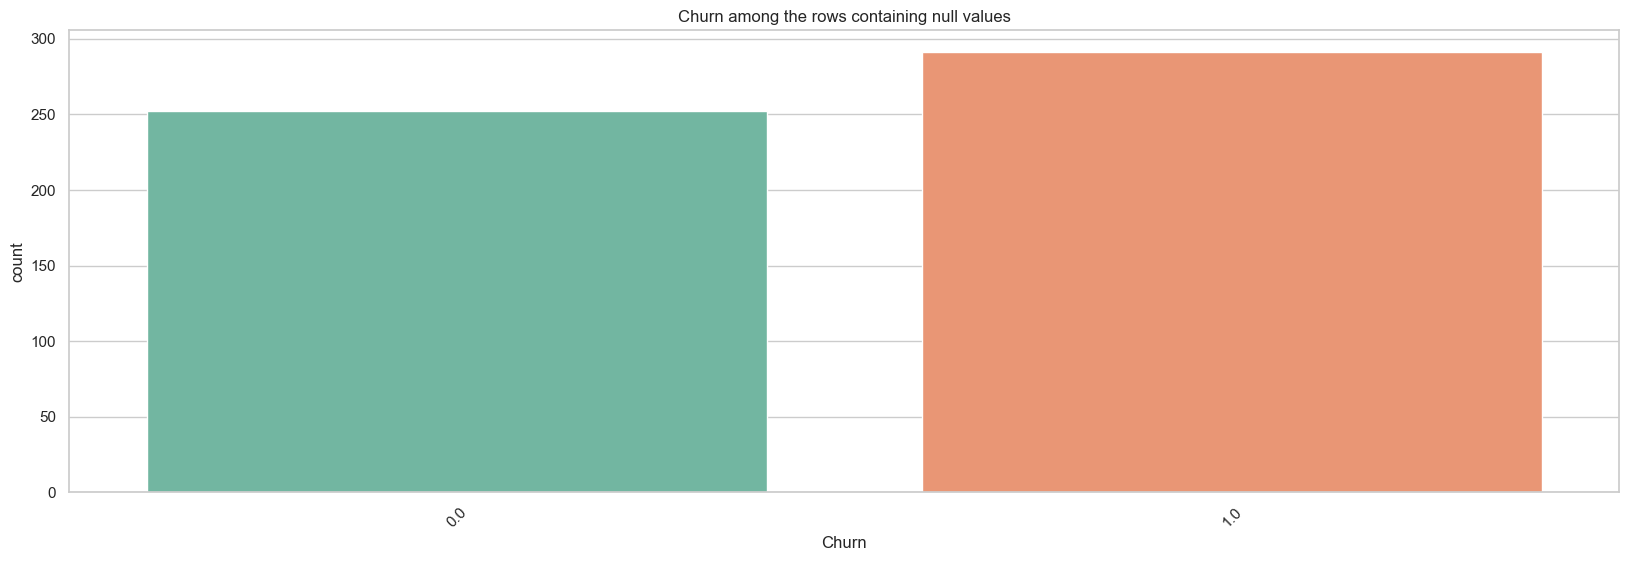

In [10]:
plt.figure(figsize=(20, 6))
sns.countplot(x=rows_with_nulls['Churn'], palette='Set2')
plt.title('Churn among the rows containing null values')
plt.xticks(rotation=45)
plt.show()

Both catergories of the `Churn` column are nearly equaly distributed among the rows containing null values. Removing those rows won't create any noticeble bias.

In [11]:
# Dropping the null rows
df=df.dropna()
df.reset_index(drop=True, inplace=True)

Let's check wether removing the null row has removed any class of a catrgorical column from the data set. (Comparing unique value counts beofore and after null rows removal) 

In [12]:
print('Before:')
print(df.nunique())
print('-'*10)
print('After:')
print(df.nunique())

Before:
CustomerID           440287
Age                      48
Gender                    2
Tenure                   60
Usage Frequency          30
Support Calls            11
Payment Delay            31
Subscription Type         3
Contract Length           3
Total Spend           68339
Last Interaction         30
Churn                     2
dtype: int64
----------
After:
CustomerID           440287
Age                      48
Gender                    2
Tenure                   60
Usage Frequency          30
Support Calls            11
Payment Delay            31
Subscription Type         3
Contract Length           3
Total Spend           68339
Last Interaction         30
Churn                     2
dtype: int64


Directly dropping the rows with null values hasn't affected the number of unique values in catergorical columns

In [13]:
# data = []

# for column in categorical_columns:
#     unique_values = df[column].value_counts()
#     for value, count in unique_values.items():
#         data.append({'Column Name': column, 
#                      'Unique Value': value, 
#                      'Value Count': count})

# unique_value_table = pd.DataFrame(data)
# unique_value_table.set_index(['Column Name', 'Unique Value','Value Count'], inplace=True)

# unique_value_table

In [14]:
df = df.drop('CustomerID',axis=1) # CustomerID doesn't have any siginificance with given task

# EDA on `Age` column

In [15]:
df['Age'].describe()

count    440287.000000
mean         39.373077
std          12.442501
min          18.000000
25%          29.000000
50%          39.000000
75%          48.000000
max          65.000000
Name: Age, dtype: float64

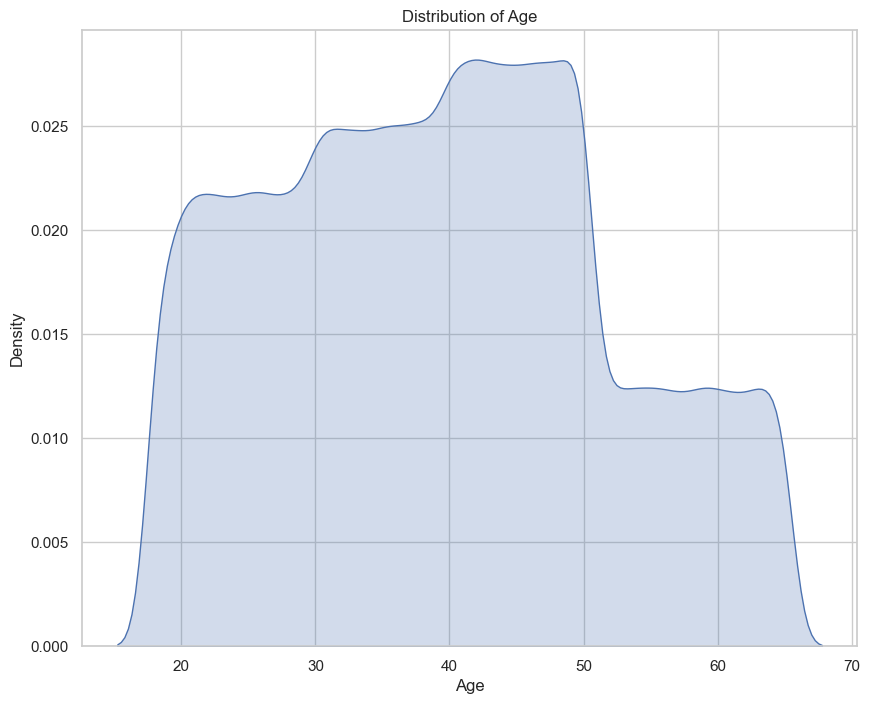

In [16]:
column='Age'
plt.figure(figsize=(10,8))
sns.kdeplot(data = df , x = df[column] , fill = True)
plt.title(f'Distribution of {column}')
plt.show()

Ditribution of Age is slighlty positively skewed which means most of the customers are young

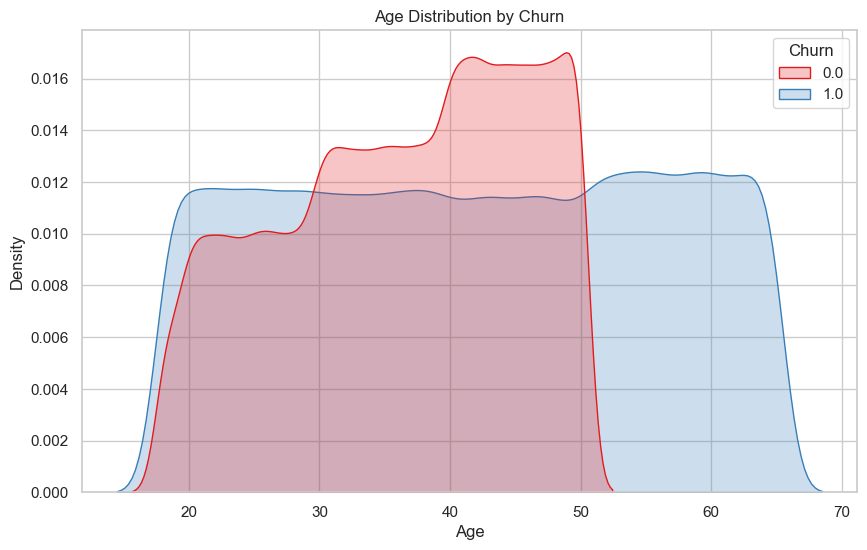

In [17]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='Age', hue='Churn', fill=True, palette='Set1')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Churn')
plt.show()

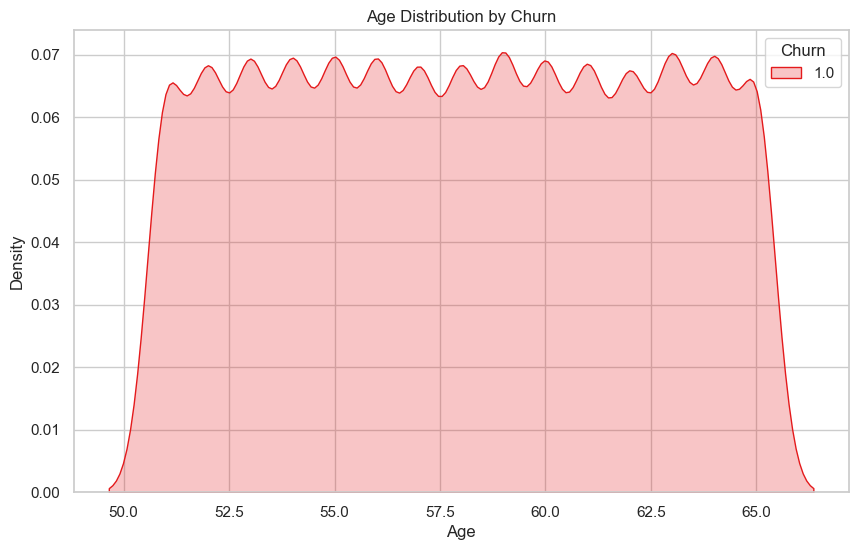

In [18]:
# Filtering the customers older than 50 for more insights
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df[df['Age']>50], x='Age', hue='Churn', fill=True, palette='Set1')
plt.xlabel('Age')
plt.ylabel('Density')
plt.title('Age Distribution by Churn')
plt.show()

In [19]:
df[(df['Age'] >60) & (df['Churn'] == 0)]

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn


Everybody older than 60 stop using company's products 

In [20]:
# Grouping people into age groups of 10 year
def age_grouping(x):
    n=int(x//10)
    return str(n*10)+'-'+str(n*10+9)
df['Age_group']=df['Age'].apply(age_grouping)
df = df.drop('Age',axis=1)

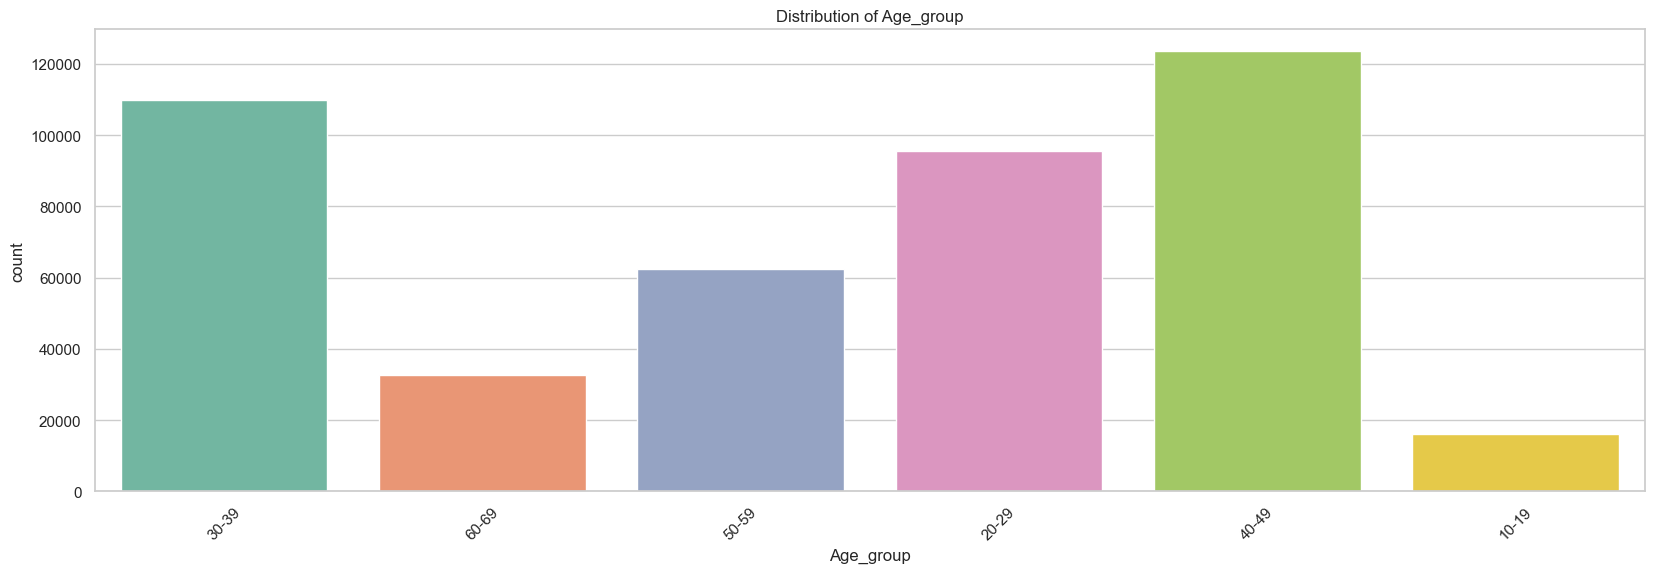

In [21]:
plt.figure(figsize=(20, 6))
sns.countplot(x=df['Age_group'], palette='Set2')
plt.title(f'Distribution of Age_group')
plt.xticks(rotation=45)
plt.show()

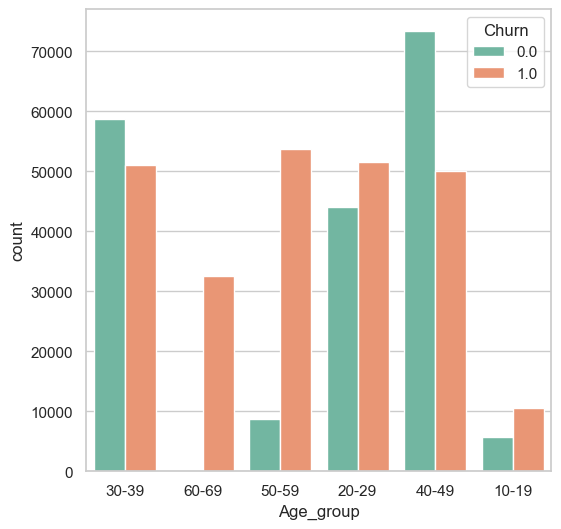

In [22]:
plt.figure(figsize=(6,6))
sns.countplot(x='Age_group',hue='Churn',data=df,palette='Set2')
plt.title(f'')
plt.show()

There's a lower count of 10-19 customers, so 10-19 and 20-29 will be grouped into one group

In [23]:
df['Age_group']=df['Age_group'].apply(lambda x:'10-29' if x in ['10-19','20-29'] else x)

In [24]:
df.groupby('Age_group')['Churn'].mean()

Age_group
10-29    0.555206
30-39    0.465230
40-49    0.405663
50-59    0.861084
60-69    1.000000
Name: Churn, dtype: float64

# EDA  on `Gender`

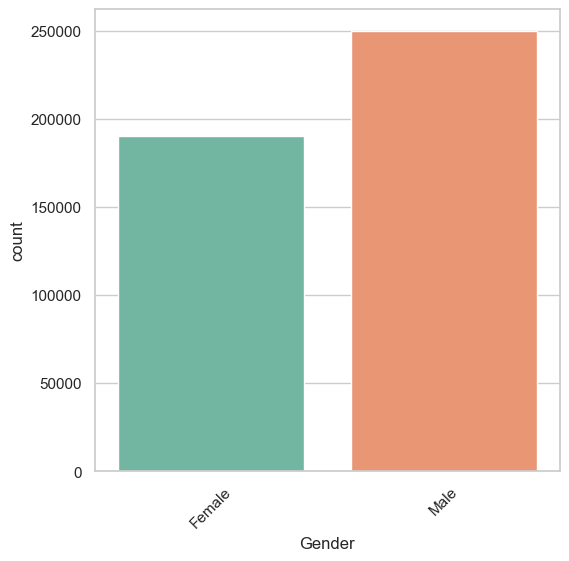

In [25]:
plt.figure(figsize=(6, 6))
sns.countplot(x=df['Gender'], palette='Set2')
plt.title('')
plt.xticks(rotation=45)
plt.show()

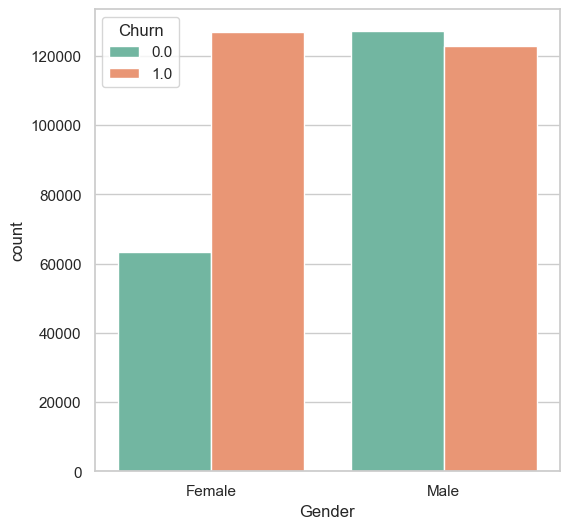

In [26]:
plt.figure(figsize=(6,6))
sns.countplot(x='Gender',hue='Churn',data=df,palette='Set2')
plt.title(f'')
plt.show()

In [27]:
df.groupby('Gender')['Churn'].mean()

Gender
Female    0.666674
Male      0.491340
Name: Churn, dtype: float64

- Most of the customers are Male(>50%)
- Female customers stops using the services at a higher rate than the male customers

# EDA on `Tenure`

<Axes: xlabel='Tenure', ylabel='Count'>

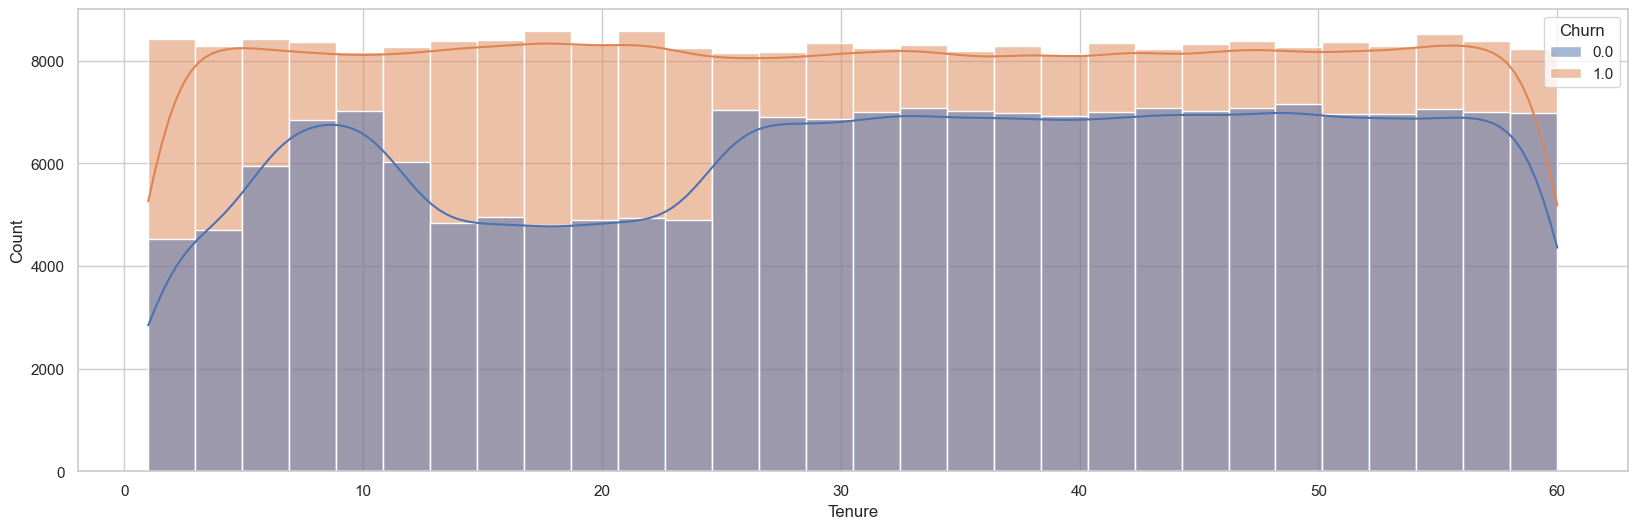

In [28]:
plt.figure(figsize=(20,6))
sns.histplot(df, x="Tenure", hue="Churn", bins=30,kde=True)

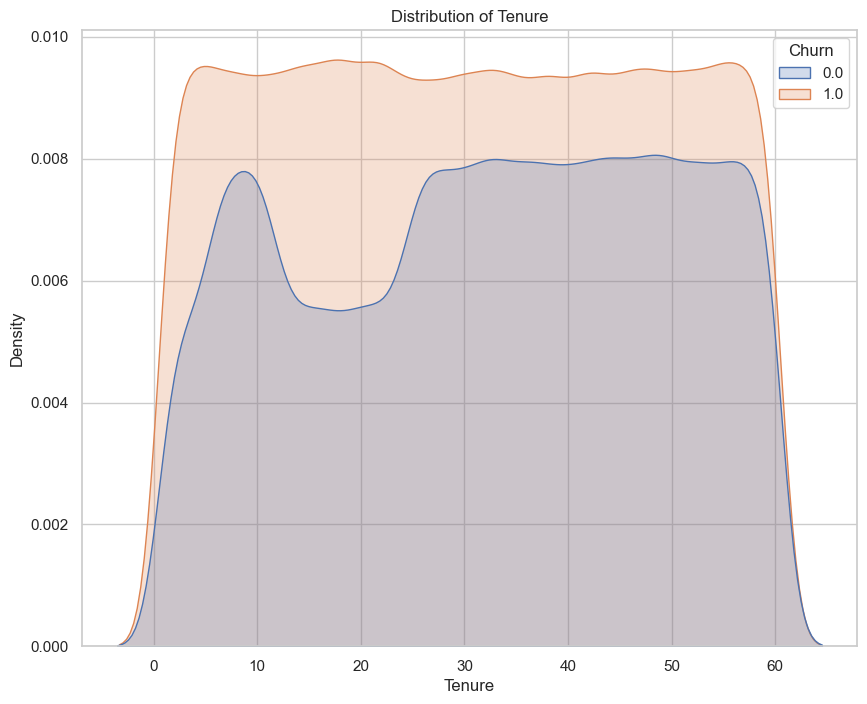

In [29]:
column='Tenure'
plt.figure(figsize=(10,8))
sns.kdeplot(data = df , x = df[column] , fill = True,hue="Churn")
plt.title(f'Distribution of {column}')
plt.show()

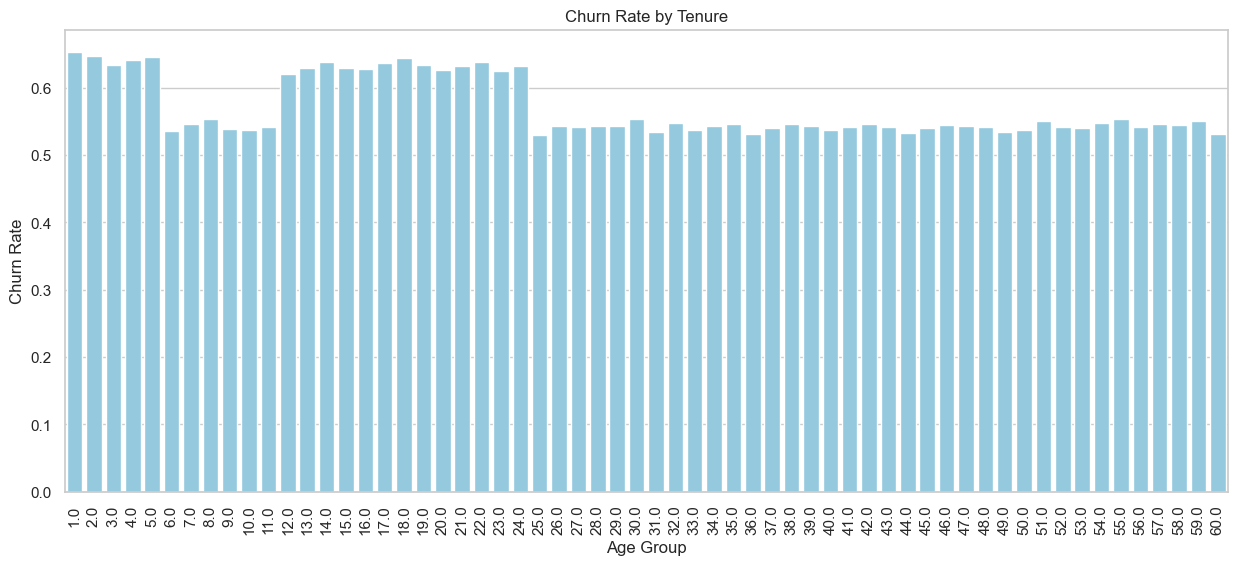

In [30]:
tenure_churn_rate=df.groupby('Tenure')['Churn'].mean()

plt.figure(figsize=(15, 6))
sns.barplot(x=tenure_churn_rate.index, y=tenure_churn_rate.values, color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Tenure')
plt.xticks(rotation=90)
plt.show()

Customers with 1-5 tenure and 12-24 tenure tends to stops using companys' product compared to other tenures(~0.5 churn rate). The other tenures are uniformly distributed

# EDA on `Usage Frequency`

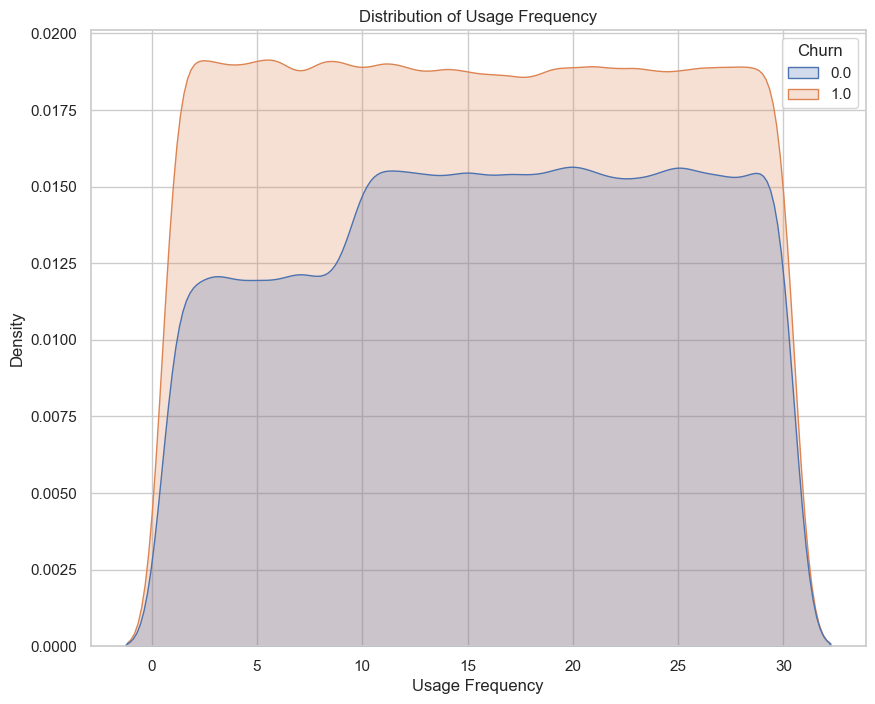

In [31]:
column='Usage Frequency'
plt.figure(figsize=(10,8))
sns.kdeplot(data = df , x = df[column] , fill = True,hue="Churn")
plt.title(f'Distribution of {column}')
plt.show()

<Axes: xlabel='Usage Frequency', ylabel='Count'>

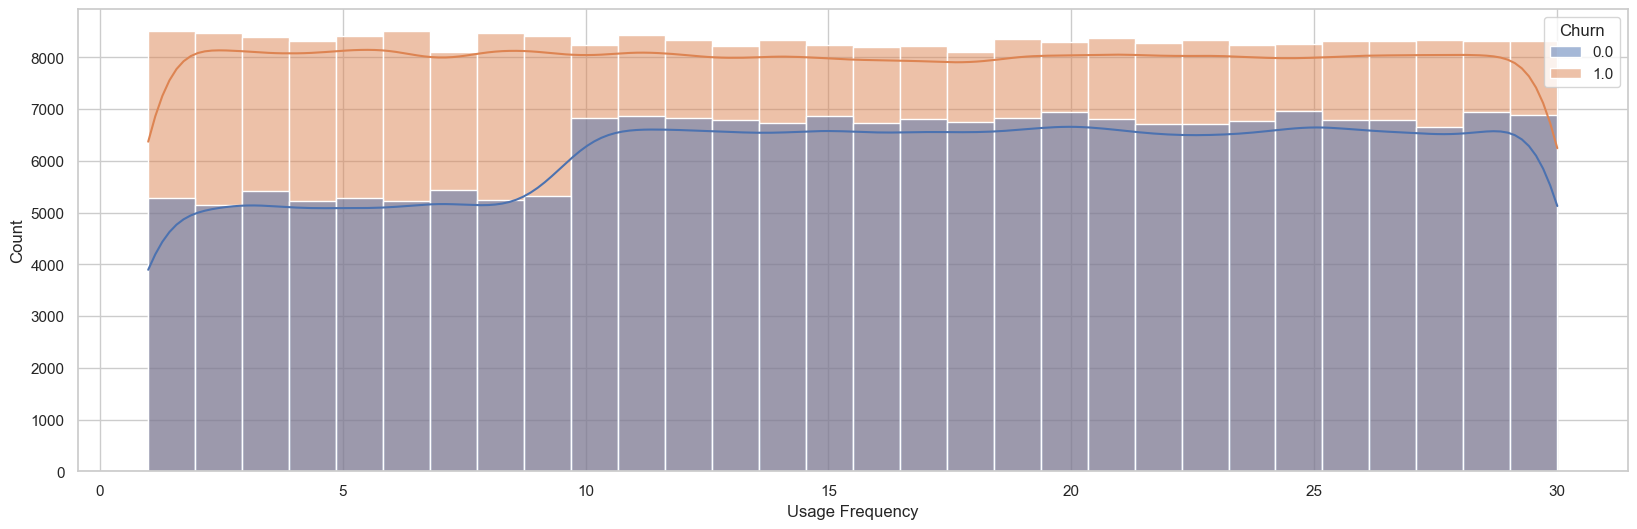

In [32]:
plt.figure(figsize=(20,6))
sns.histplot(df, x="Usage Frequency", hue="Churn", bins=30,kde=True)

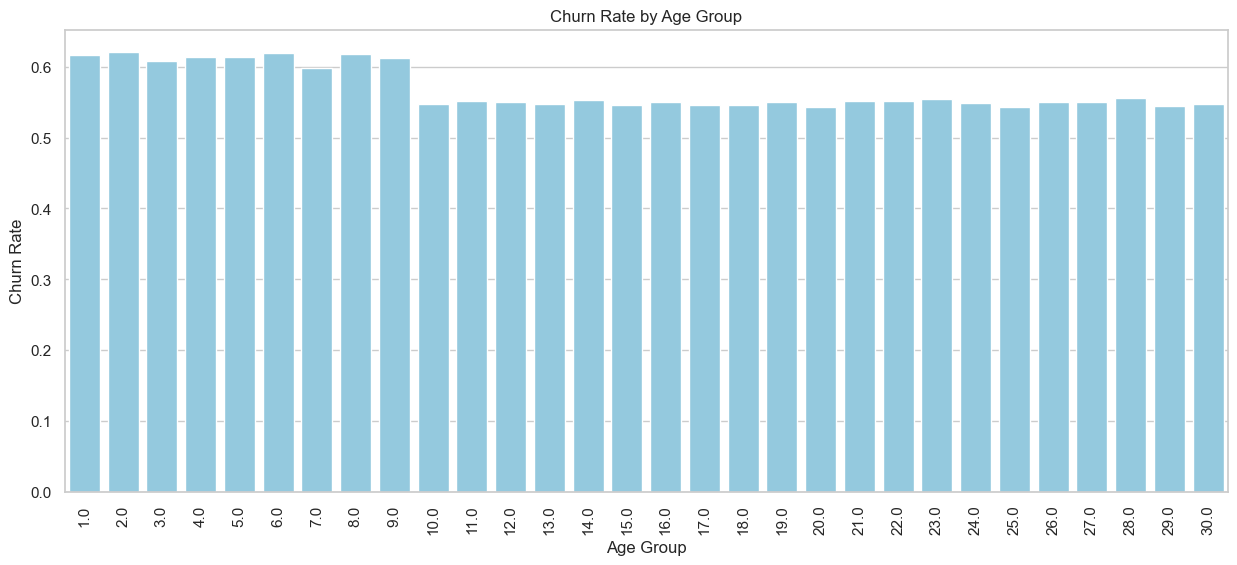

In [33]:
tenure_churn_rate=df.groupby('Usage Frequency')['Churn'].mean()

plt.figure(figsize=(15, 6))
sns.barplot(x=tenure_churn_rate.index, y=tenure_churn_rate.values, color='skyblue')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Age Group')
plt.xticks(rotation=90)
plt.show()

- churn rates for 0 - 9 usage frequency is slightly higher than the rest. Otherwise it's mostly uniformly distributed (0.5-0.6) 
- Usage frequency doesn't do much influence on the churn

# EDA on `Support Calls`

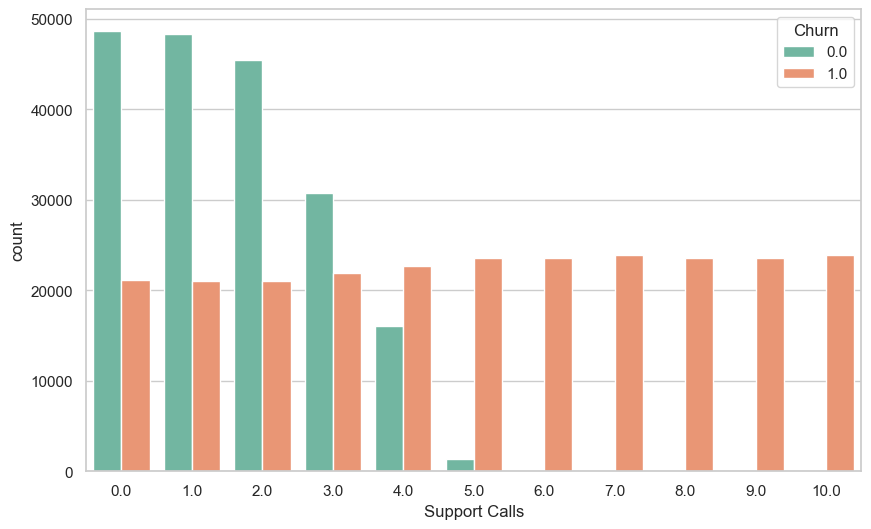

In [34]:
plt.figure(figsize=(10,6))
sns.countplot(x='Support Calls',hue='Churn',data=df,palette='Set2')
plt.title(f'')
plt.show()

As the number support calls taken by a customer is high, that custmoer is most likely to stop using the company's products. If the number of support calls are higher than 5, the customer gonna definitly stop using the company's products.

# EDA on `Payment Delay`

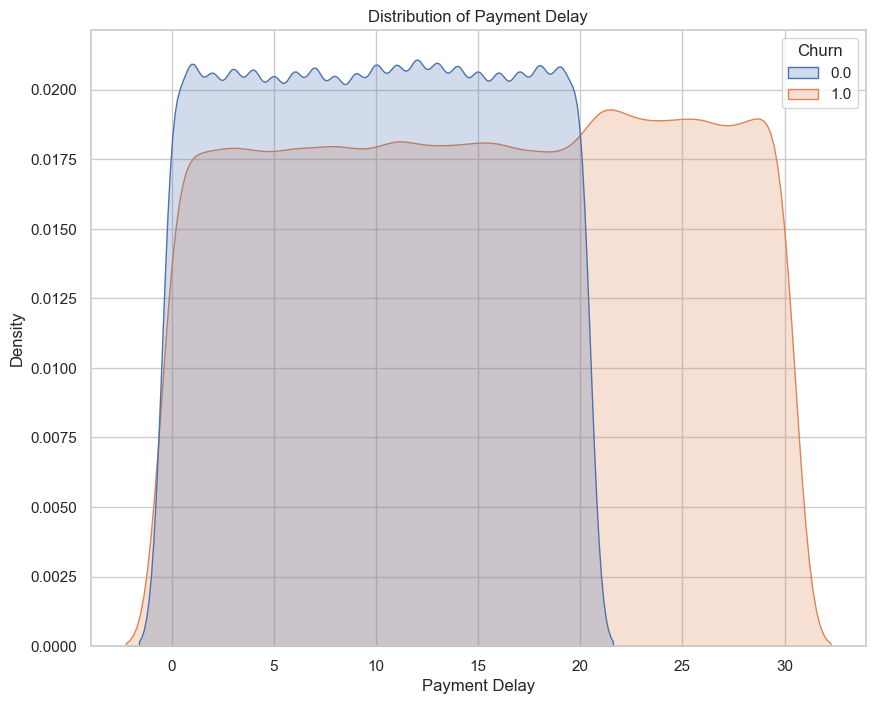

In [35]:
column='Payment Delay'
plt.figure(figsize=(10,8))
sns.kdeplot(data = df , x = df[column] , fill = True,hue="Churn")
plt.title(f'Distribution of {column}')
plt.show()

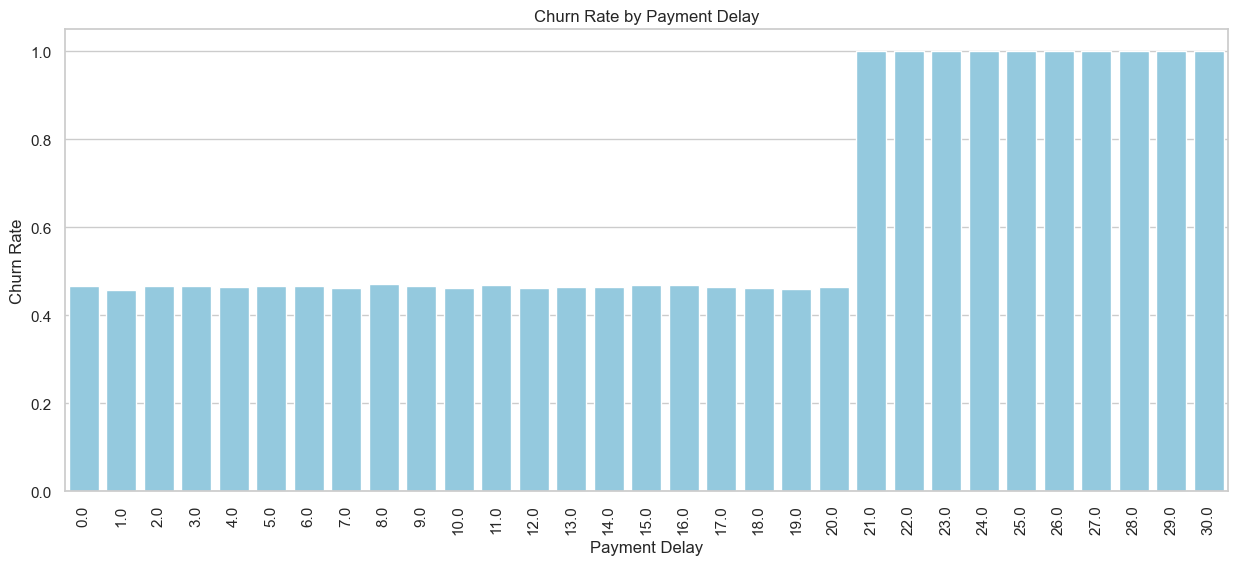

In [36]:
tenure_churn_rate=df.groupby('Payment Delay')['Churn'].mean()

plt.figure(figsize=(15, 6))
sns.barplot(x=tenure_churn_rate.index, y=tenure_churn_rate.values, color='skyblue')
plt.xlabel('Payment Delay')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Payment Delay')
plt.xticks(rotation=90)
plt.show()

The customers who stop using company's product tends to do delayed payments. All of the delayed payments (>20) are from churned customers.

# EDA on `Subscription Type`

In [37]:
df['Subscription Type'].value_counts()

Subscription Type
Standard    148952
Premium     148490
Basic       142845
Name: count, dtype: int64

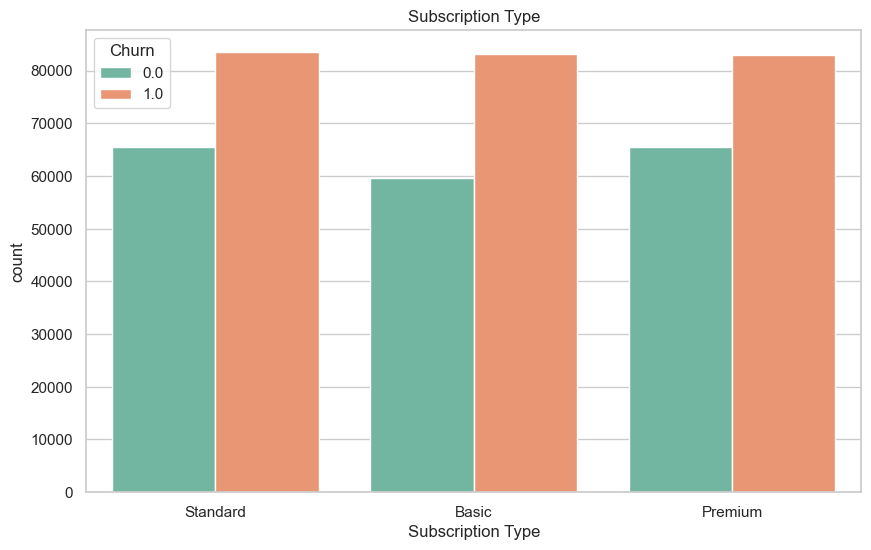

In [38]:
plt.figure(figsize=(10,6))
sns.countplot(x='Subscription Type',hue='Churn',data=df,palette='Set2')
plt.title('Subscription Type')
plt.show()

In [39]:
df.groupby('Subscription Type')['Churn'].mean()

Subscription Type
Basic       0.581917
Premium     0.559358
Standard    0.560738
Name: Churn, dtype: float64

Subscription Type doesn't affect the churn rate

# EDA on `Contract Length`

In [40]:
df['Contract Length'].value_counts()

Contract Length
Annual       176974
Quarterly    176308
Monthly       87005
Name: count, dtype: int64

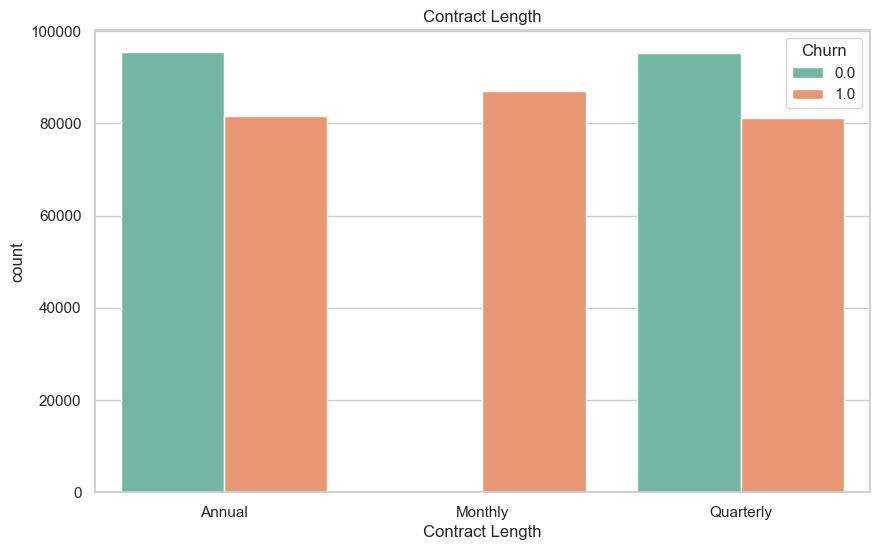

In [41]:
plt.figure(figsize=(10,6))
sns.countplot(x='Contract Length',hue='Churn',data=df,palette='Set2')
plt.title('Contract Length')
plt.show()

In [42]:
df[(df['Contract Length'] == 'Monthly') & (df['Churn'] == 0)]

,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Age_group


In [43]:
df.groupby('Contract Length')['Churn'].mean()

Contract Length
Annual       0.460825
Monthly      1.000000
Quarterly    0.460257
Name: Churn, dtype: float64

All the customers with monthly contracts churn. Customers with quaterly and annual contracts have similar charactersistics

# EDA on `Total Spend`

In [44]:
df['Total Spend'].describe()

count    440287.000000
mean        631.611947
std         240.812345
min         100.000000
25%         480.000000
50%         661.000000
75%         830.000000
max        1000.000000
Name: Total Spend, dtype: float64

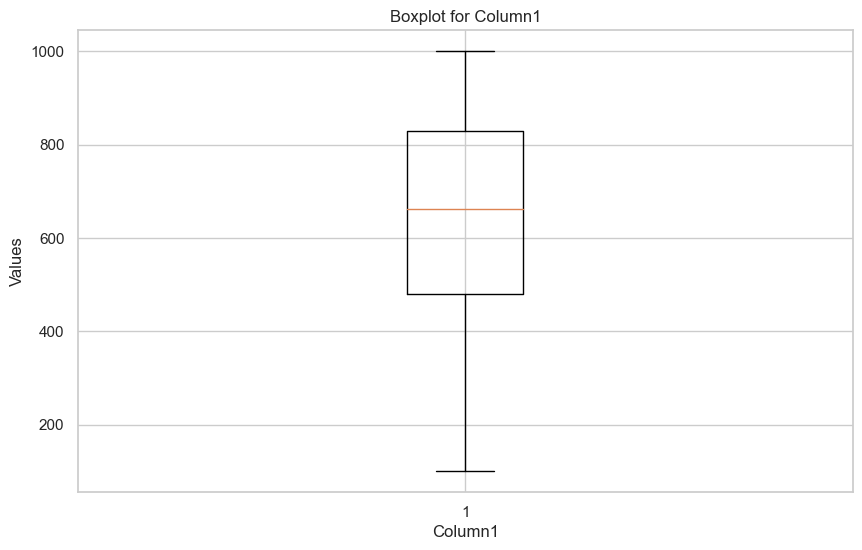

In [45]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['Total Spend'])
plt.title('Boxplot for Column1')
plt.xlabel('Column1')
plt.ylabel('Values')
plt.show()

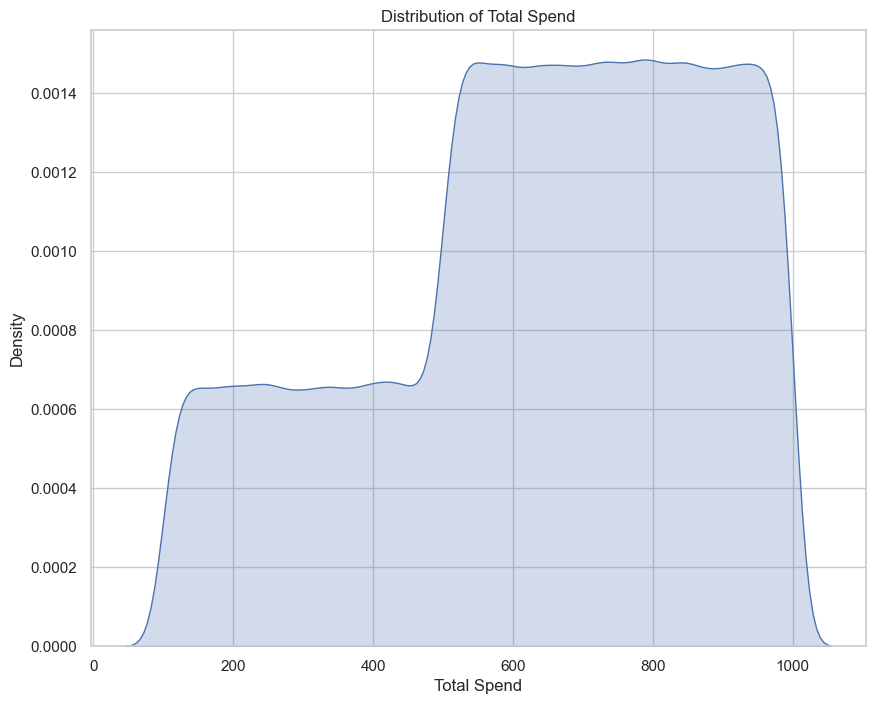

In [46]:
column='Total Spend'
plt.figure(figsize=(10,8))
sns.kdeplot(data = df , x = df[column] , fill = True)
plt.title(f'Distribution of {column}')
plt.show()

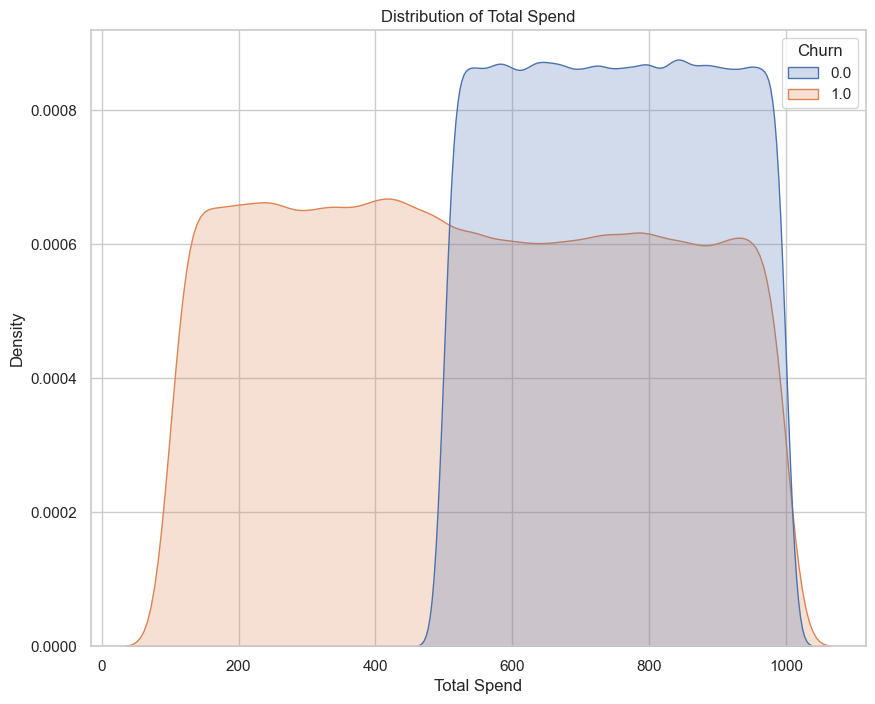

In [47]:
column='Total Spend'
plt.figure(figsize=(10,8))
sns.kdeplot(data = df , x = df[column] , fill = True,hue="Churn")
plt.title(f'Distribution of {column}')
plt.show()

All customers with who spend more lesser than nearly 500 tend to churn. As the spending increases users tend not to leave the company's services. 

# EDA on `Last Interaction`

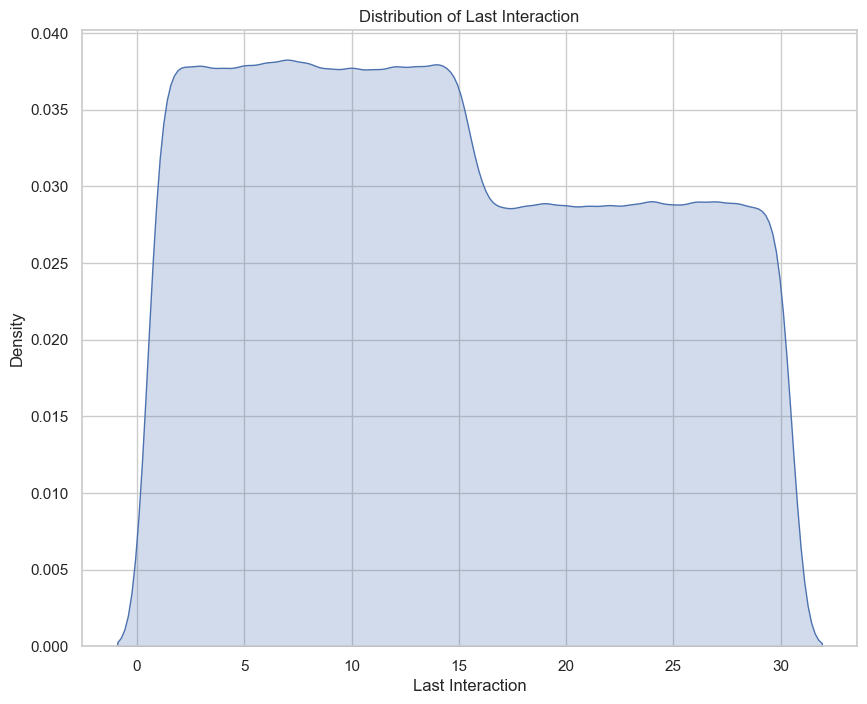

In [48]:
column='Last Interaction'
plt.figure(figsize=(10,8))
sns.kdeplot(data = df , x = df[column] , fill = True)
plt.title(f'Distribution of {column}')
plt.show()

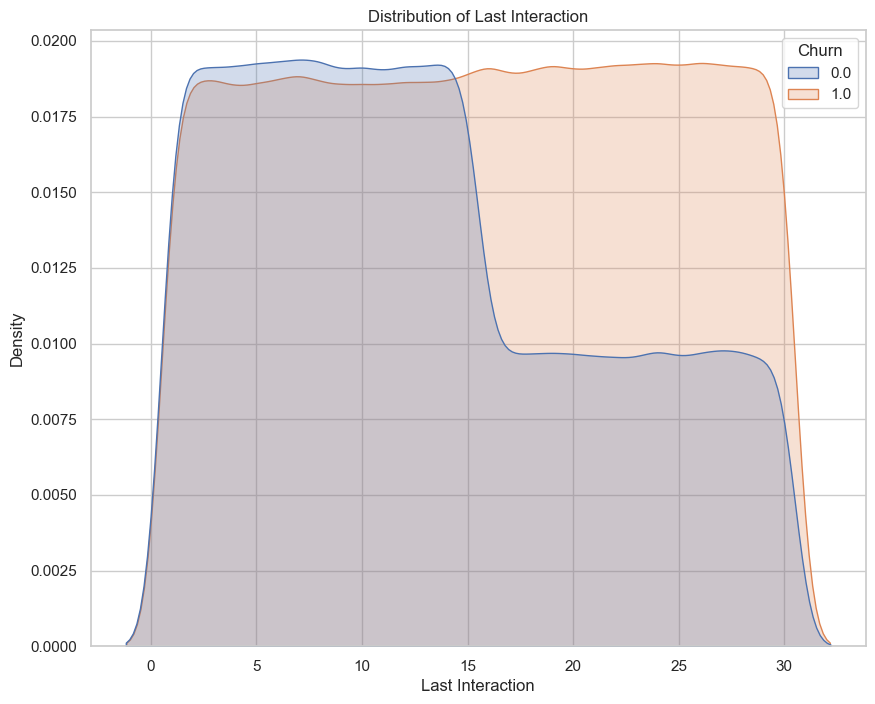

In [49]:
column='Last Interaction'
plt.figure(figsize=(10,8))
sns.kdeplot(data = df , x = df[column] , fill = True,hue="Churn")
plt.title(f'Distribution of {column}')
plt.show()

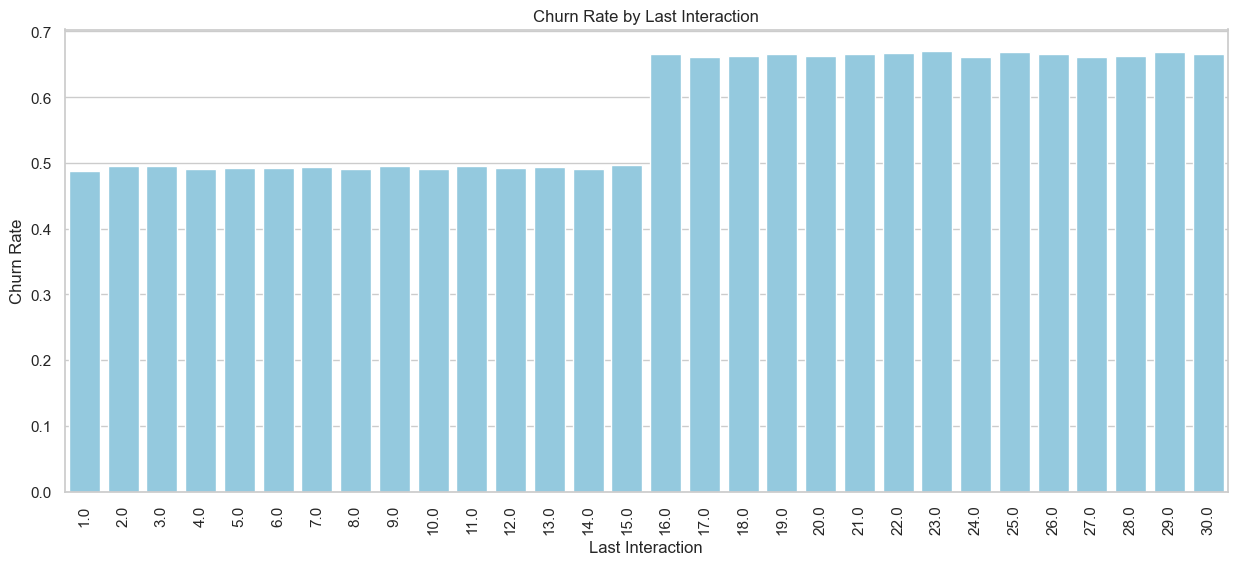

In [50]:
tenure_churn_rate=df.groupby('Last Interaction')['Churn'].mean()

plt.figure(figsize=(15, 6))
sns.barplot(x=tenure_churn_rate.index, y=tenure_churn_rate.values, color='skyblue')
plt.xlabel('Last Interaction')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Last Interaction')
plt.xticks(rotation=90)
plt.show()

After Last interaction-15, churn rate increases. That means some of the users stop using company's services even before the end of the contract period.

# EDA on target variable - `Churn`  

Churn
1.0    249706
0.0    190581
Name: count, dtype: int64


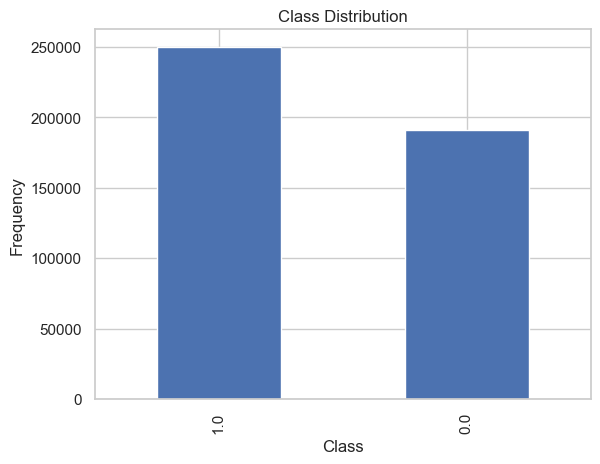

Imbalance Ratio: 0.76


In [51]:
class_distribution = df['Churn'].value_counts()
print(class_distribution)

# Bar plot
class_distribution.plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

# Compute the imbalance ratio
minority_class = class_distribution.min()
majority_class = class_distribution.max()
imbalance_ratio = minority_class / majority_class
print(f'Imbalance Ratio: {imbalance_ratio:.2f}')

There is a slight class imbalance in the dataset. Models will be evaluated first, and if the imbalance affects their performance, it will be addressed using a technique like SMOTE.

# Label encoding

In [52]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

encoders = {}

# Iterate over each categorical column
for column in df.select_dtypes(include=['object']):
    encoder = LabelEncoder()
    df[column] = encoder.fit_transform(df[column])
    encoders[column] = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))

# Mapping the value assigned by the label encoder for the classes each column
for column, mapping in encoders.items():
    print(f"Column: {column}")
    for key, value in mapping.items():
        print(f"{key}: {value}")
    print('--------------------------------')

Column: Gender
Female: 0
Male: 1
--------------------------------
Column: Subscription Type
Basic: 0
Premium: 1
Standard: 2
--------------------------------
Column: Contract Length
Annual: 0
Monthly: 1
Quarterly: 2
--------------------------------
Column: Age_group
10-29: 0
30-39: 1
40-49: 2
50-59: 3
60-69: 4
--------------------------------


# Standardizing

In [53]:
exclude_columns = ['Gender', 'Subscription Type', 'Contract Length', 'Age_group','Churn']
columns_to_scale = [col for col in df.columns if col not in exclude_columns]
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [54]:
df.describe()

,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn,Age_group
count,440287.000000,4.402870e+05,4.402870e+05,4.402870e+05,4.402870e+05,440287.000000,440287.000000,4.402870e+05,4.402870e+05,440287.000000,440287.000000
mean,0.567659,-4.170104e-17,4.195925e-17,-5.370784e-17,4.028088e-17,1.013870,0.998487,3.563308e-16,-5.835563e-17,0.567144,1.532271
std,0.495402,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,0.813973,0.895762,1.000001e+00,1.000001e+00,0.495472,1.218709
min,0.000000,-1.753358e+00,-1.724557e+00,-1.173989e+00,-1.569966e+00,0.000000,0.000000,-2.207580e+00,-1.568202e+00,0.000000,0.000000
25%,0.000000,-8.840712e-01,-7.928369e-01,-8.482792e-01,-8.434246e-01,0.000000,0.000000,-6.295862e-01,-8.702112e-01,0.000000,0.000000
50%,1.000000,4.316774e-02,2.241840e-02,-1.968600e-01,-1.168827e-01,1.000000,1.000000,1.220373e-01,-5.588798e-02,1.000000,1.000000
75%,1.000000,8.545018e-01,8.376737e-01,7.802688e-01,7.307495e-01,2.000000,2.000000,8.238294e-01,8.747671e-01,1.000000,2.000000
max,1.000000,1.665836e+00,1.652929e+00,2.083107e+00,2.062743e+00,2.000000,2.000000,1.529774e+00,1.805422e+00,1.000000,4.000000


# Feature selection based on correlation analysis

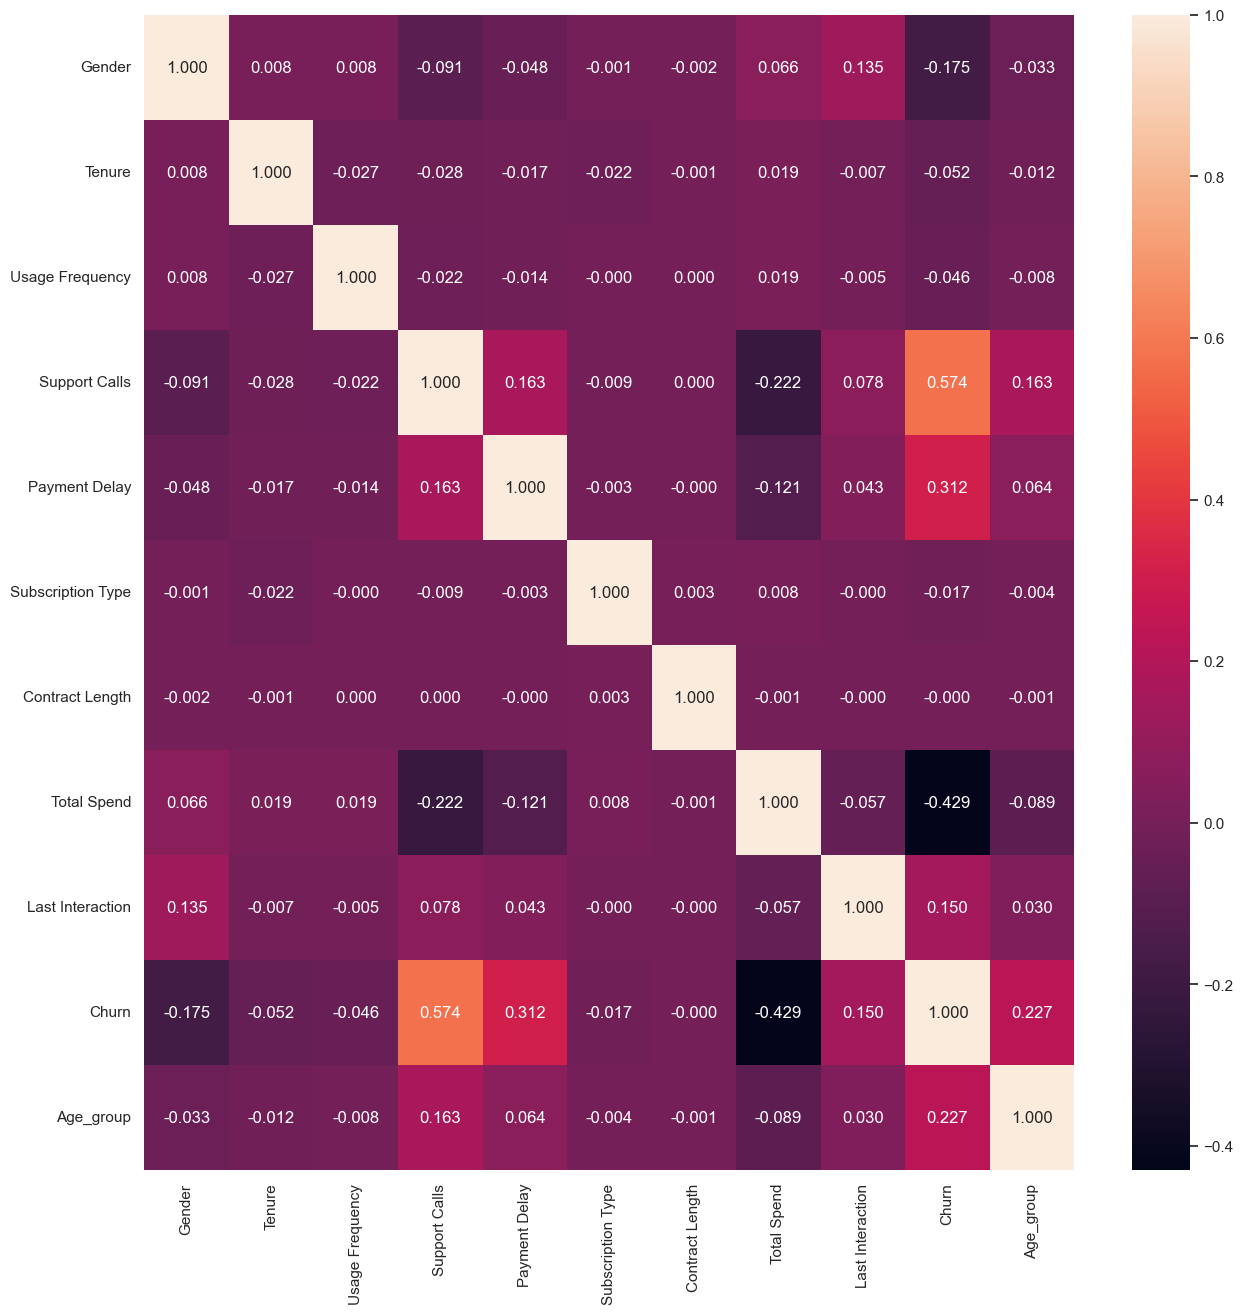

In [55]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot=True,fmt='.3f');

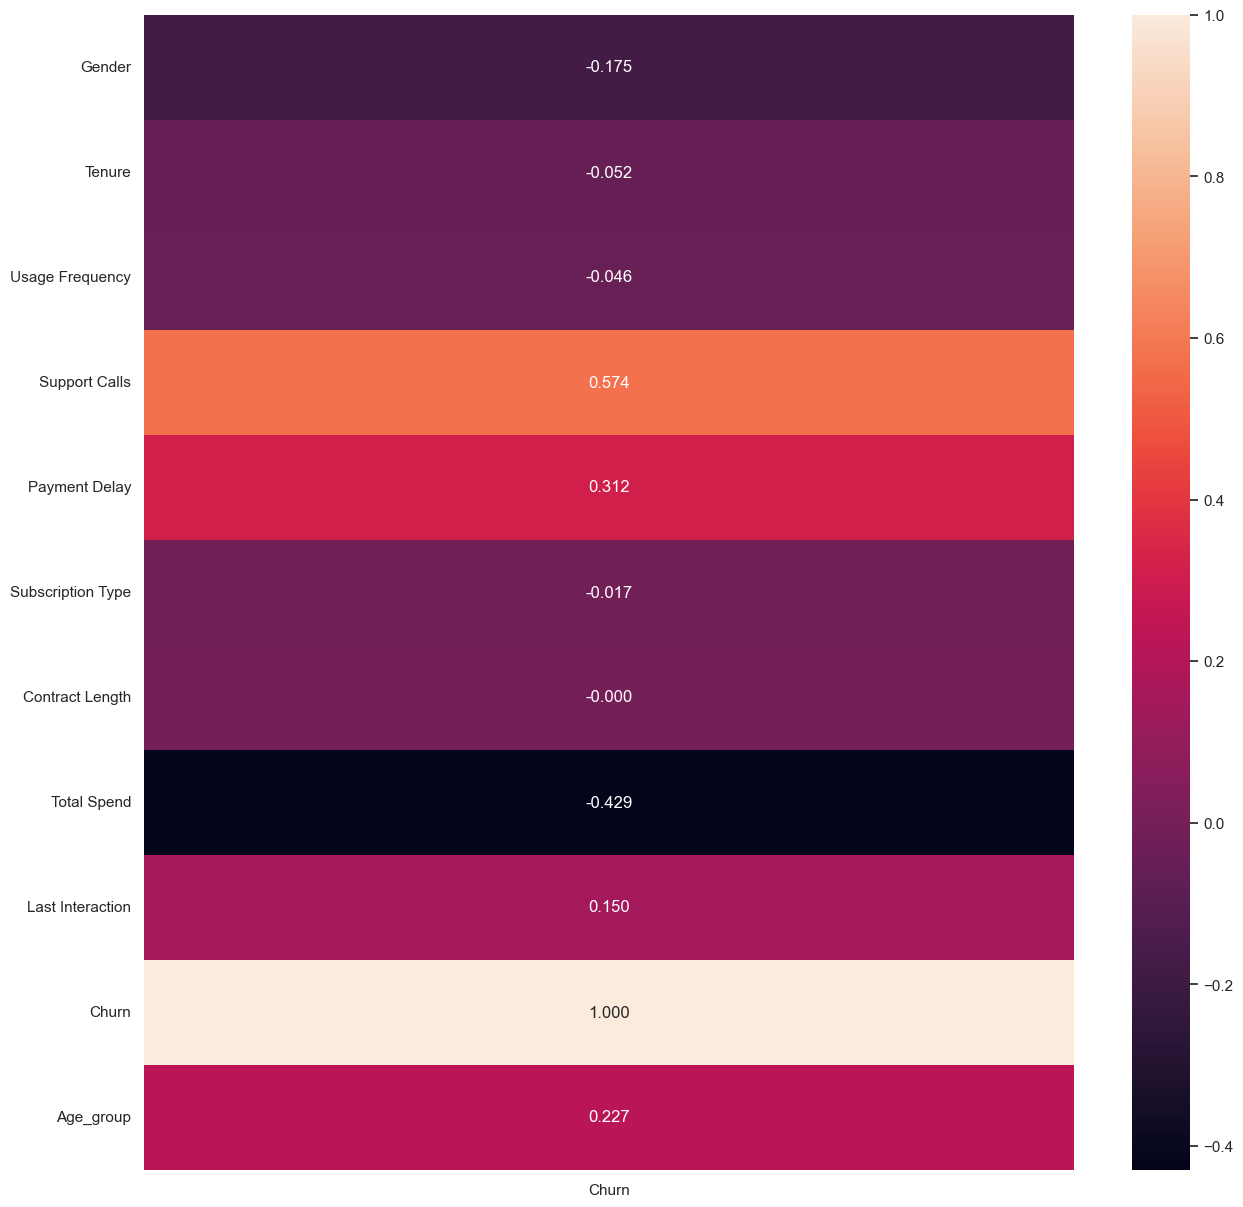

In [56]:
correlation_with_churn=df.corr()[['Churn']]

plt.figure(figsize=(15,15))
sns.heatmap(correlation_with_churn, annot=True,fmt='.3f');

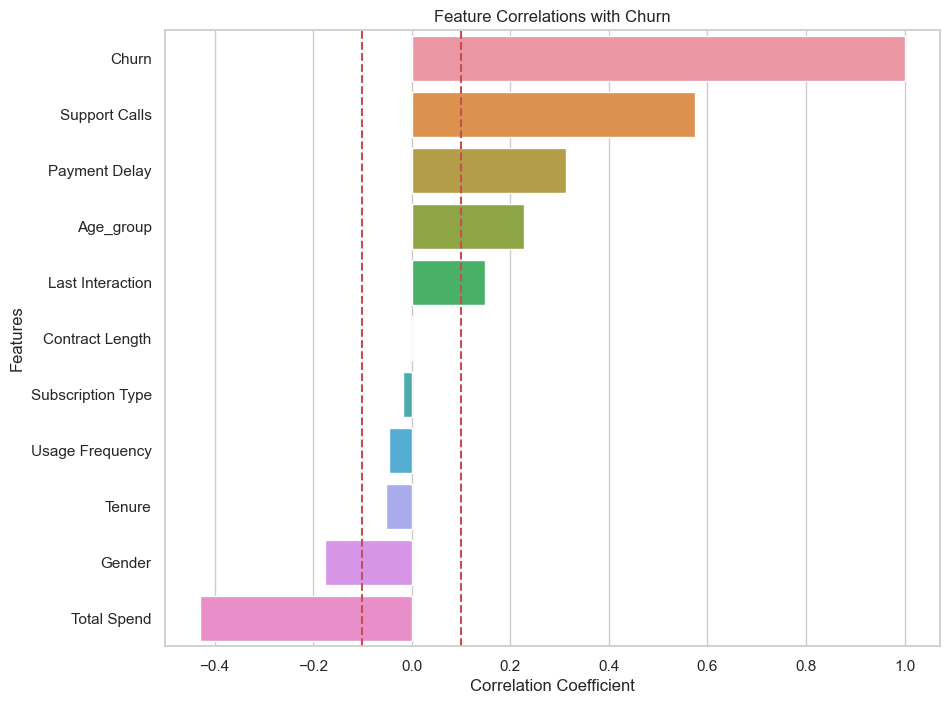

In [57]:
threshold=0.1 # columns that has a corrlation -0.1/+0.1 

correlation_with_churn=correlation_with_churn.sort_values(by='Churn', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_with_churn['Churn'], y=correlation_with_churn.index)
plt.axvline(x=threshold, color='r', linestyle='--')
plt.axvline(x=-threshold, color='r', linestyle='--')
plt.title('Feature Correlations with Churn')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.show()

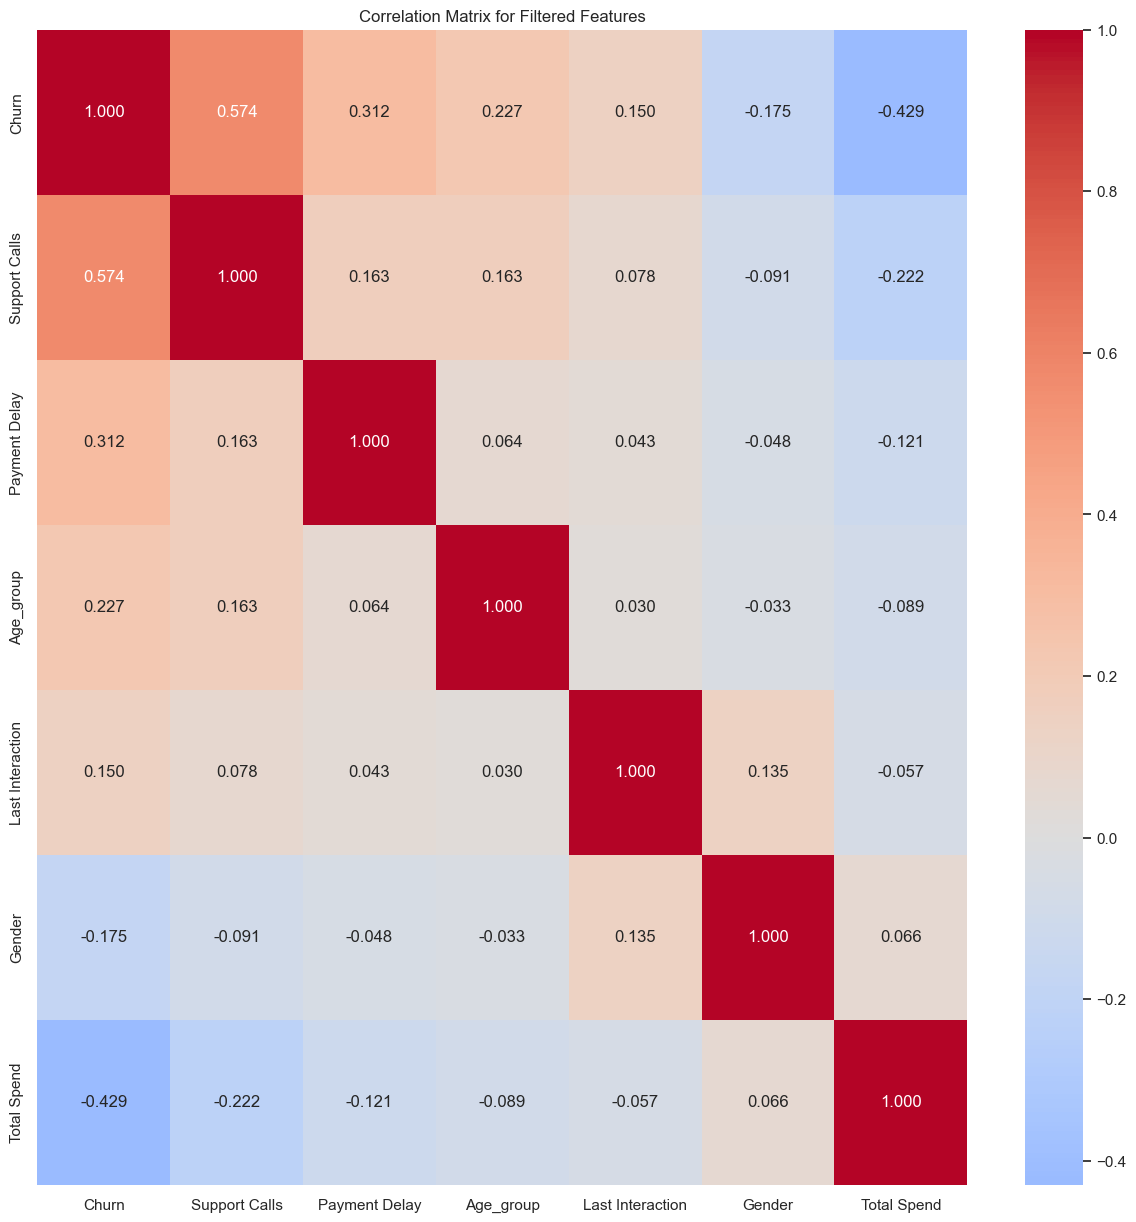

In [58]:
filtered_columns = correlation_with_churn[abs(correlation_with_churn['Churn']) > threshold].index.tolist()

# filter  the columns that have a higher 
filtered_df = df[filtered_columns]

# correlation matrix for the above filtered columns
filtered_corr_matrix = filtered_df.corr()

# Plot the correlation matrix to check for multicollinearity
plt.figure(figsize=(15, 15))
sns.heatmap(filtered_corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0)
plt.title('Correlation Matrix for Filtered Features')
plt.show()

Relative to other correlation values there's a multi colinearity between `Support Calls` and `Total Spend`. Out of those two columns `Total Spend` has the lowest colinearity with `Churn`. So `Total Spend` will be dropped due it's multi colinearity and its low correlation with `Churn` relative to its counter part. 

In [81]:
X=filtered_df.drop(columns=['Total Spend','Churn'])
y = filtered_df['Churn']

print('X: ',X.columns)

X:  Index(['Support Calls', 'Payment Delay', 'Age_group', 'Last Interaction',
       'Gender'],
      dtype='object')


# Model Evaluation

## 1. Random Forrest classifier

In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 142)

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score

Train score: 0.9388676184295912
Test score: 0.9277824464178912
Classification report-----------------------
              precision    recall  f1-score   support

         0.0       0.88      0.97      0.92     57065
         1.0       0.97      0.90      0.93     75022

    accuracy                           0.93    132087
   macro avg       0.93      0.93      0.93    132087
weighted avg       0.93      0.93      0.93    132087



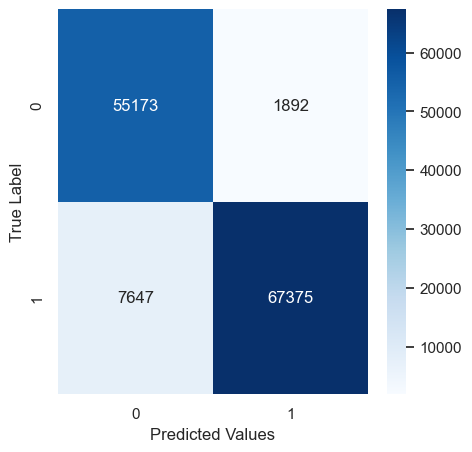

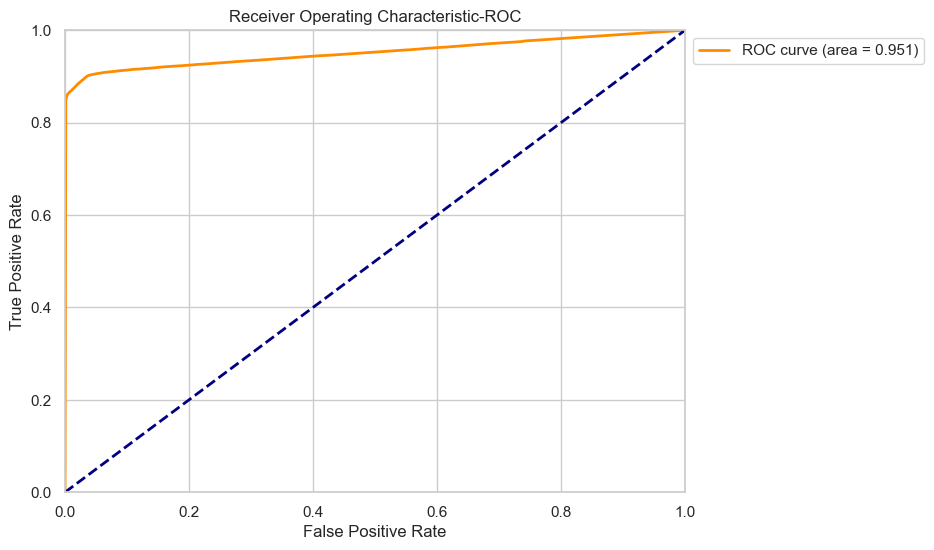

In [62]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

print('Train score:',random_forest.score(X_train,y_train))
print('Test score:',random_forest.score(X_test,y_test))
print('Classification report-----------------------')
print(classification_report(y_test, predictions))

# Confussion Matrix
plt.figure(figsize=(5,5))
labels = ["<=50K", ">50K"]
sns.heatmap(confusion_matrix(y_test, predictions), annot=True,fmt='.0f',cmap=plt.cm.Blues);
plt.xlabel("Predicted Values")
plt.ylabel("True Label")

# Get predicted probabilities for the positive class
y_score = random_forest.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve using seaborn
plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')
sns.lineplot(x=fpr, y=tpr, color='darkorange', lw=2, label=f'ROC curve (area = {round(roc_auc,3)})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic-ROC')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## 2. Decision Tree Classifier

Train score: 0.9388676184295912
Test score: 0.9264121374548593
Classification report-----------------------
              precision    recall  f1-score   support

         0.0       0.87      0.97      0.92     57065
         1.0       0.98      0.89      0.93     75022

    accuracy                           0.93    132087
   macro avg       0.92      0.93      0.93    132087
weighted avg       0.93      0.93      0.93    132087



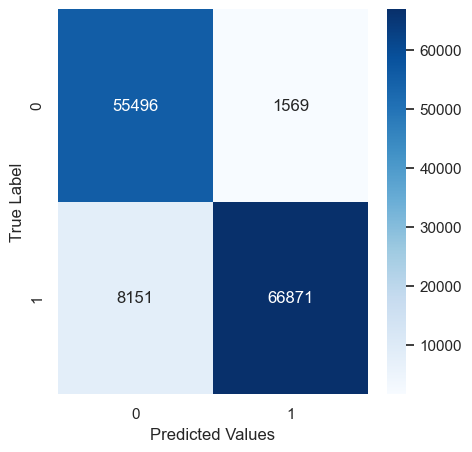

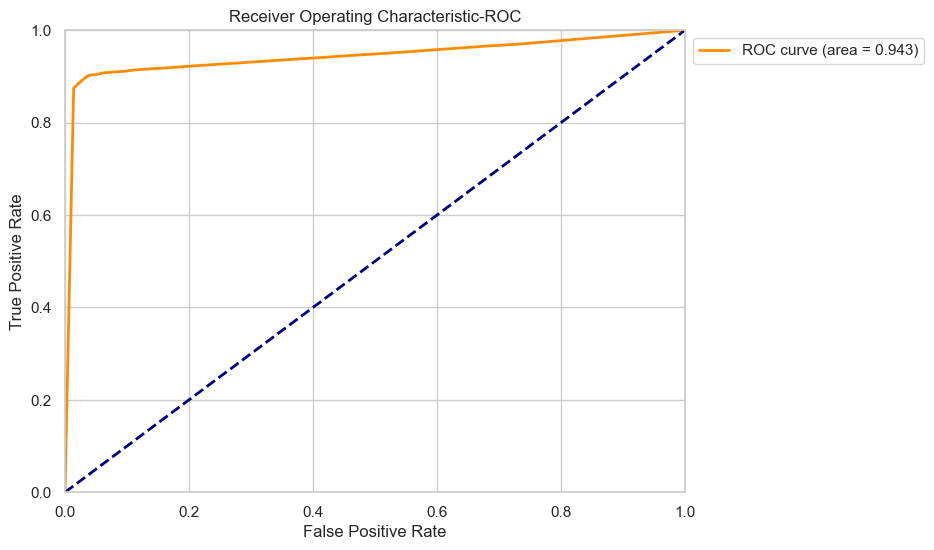

In [83]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree model
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)
predictions = decision_tree.predict(X_test)

# Print scores
print('Train score:', decision_tree.score(X_train, y_train))
print('Test score:', decision_tree.score(X_test, y_test))

# Classification report
print('Classification report-----------------------')
print(classification_report(y_test, predictions))

# Confusion Matrix
plt.figure(figsize=(5,5))
labels = ["<=50K", ">50K"]
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted Values")
plt.ylabel("True Label")

# Get predicted probabilities for the positive class
y_score = decision_tree.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve using seaborn
plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')
sns.lineplot(x=fpr, y=tpr, color='darkorange', lw=2, label=f'ROC curve (area = {round(roc_auc, 3)})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic-ROC')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## 3. Logictic Regression

In [64]:
from sklearn.linear_model import LogisticRegression

In [65]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
predictions = log_reg.predict(X_test)

print('Train score:',log_reg.score(X_train,y_train))
print('Test score:',log_reg.score(X_test,y_test))
print('Classification report-----------------------')
print(classification_report(y_test, predictions))

Train score: 0.8073815704088254
Test score: 0.8066955869994776
Classification report-----------------------
              precision    recall  f1-score   support

         0.0       0.76      0.80      0.78     57065
         1.0       0.84      0.81      0.83     75022

    accuracy                           0.81    132087
   macro avg       0.80      0.81      0.80    132087
weighted avg       0.81      0.81      0.81    132087



Text(29.75, 0.5, 'True Label')

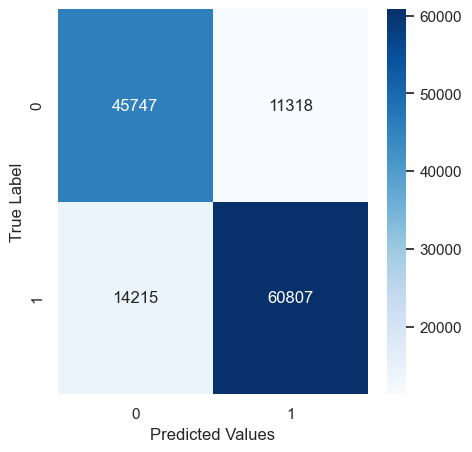

In [66]:
plt.figure(figsize=(5,5))
labels = ["<=50K", ">50K"]
sns.heatmap(confusion_matrix(y_test, predictions), annot=True,fmt='.0f'
            #, xticklabels=labels, 
            #yticklabels=labels
            ,cmap=plt.cm.Blues);
plt.xlabel("Predicted Values")
plt.ylabel("True Label")

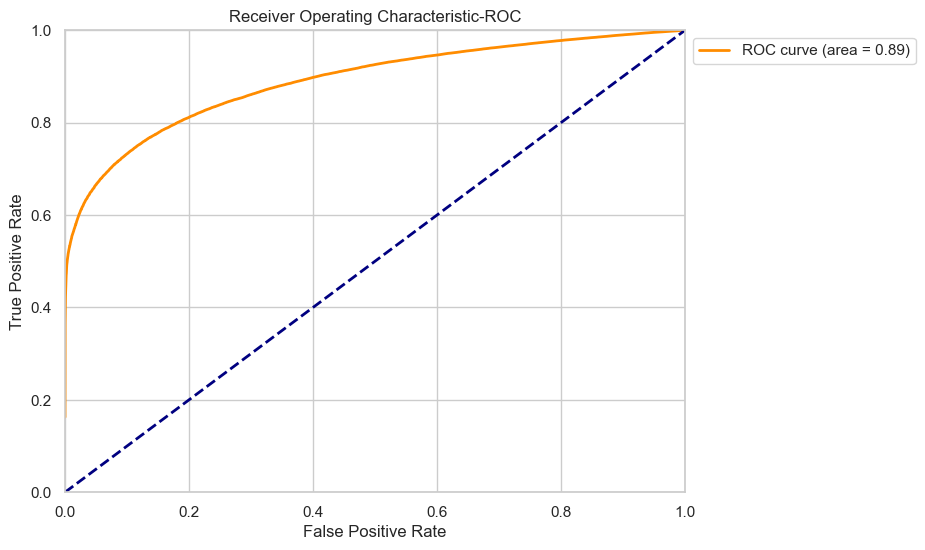

In [67]:
# Get predicted probabilities for the positive class
y_score = log_reg.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve using seaborn
plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')
sns.lineplot(x=fpr, y=tpr, color='darkorange', lw=2, label=f'ROC curve (area = {round(roc_auc,3)})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic-ROC')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## 4. Bernouli Naive bayes

In [68]:
from sklearn.naive_bayes import BernoulliNB

In [69]:
bnb=BernoulliNB()
bnb.fit(X_train,y_train)
bnb_predictions = bnb.predict(X_test)

print('Train score:',bnb.score(X_train,y_train))
print('Test score:',bnb.score(X_test,y_test))
print('Classification report-----------------------')
print(classification_report(y_test, bnb_predictions))

Train score: 0.7982770927968852
Test score: 0.7949457554490601
Classification report-----------------------
              precision    recall  f1-score   support

         0.0       0.71      0.90      0.79     57065
         1.0       0.90      0.72      0.80     75022

    accuracy                           0.79    132087
   macro avg       0.80      0.81      0.79    132087
weighted avg       0.82      0.79      0.80    132087



Text(29.75, 0.5, 'True Label')

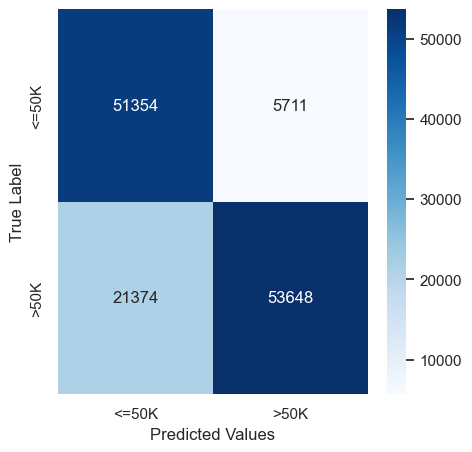

In [70]:
plt.figure(figsize=(5,5))
labels = ["<=50K", ">50K"]
sns.heatmap(confusion_matrix(y_test, bnb_predictions), annot=True,fmt='.0f', xticklabels=labels, yticklabels=labels,cmap=plt.cm.Blues);
plt.xlabel("Predicted Values")
plt.ylabel("True Label")

## 5. ANN

In [71]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

Epoch 1/100
24656/24656 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step - accuracy: 0.9122 - loss: 0.2293 - val_accuracy: 0.9314 - val_loss: 0.1944
Epoch 2/100
24656/24656 ━━━━━━━━━━━━━━━━━━━━ 24s 992us/step - accuracy: 0.9303 - loss: 0.1931 - val_accuracy: 0.9301 - val_loss: 0.1912
Epoch 3/100
24656/24656 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - accuracy: 0.9317 - loss: 0.1908 - val_accuracy: 0.9322 - val_loss: 0.1898
Epoch 4/100
24656/24656 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - accuracy: 0.9306 - loss: 0.1918 - val_accuracy: 0.9322 - val_loss: 0.1909
Epoch 5/100
24656/24656 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - accuracy: 0.9312 - loss: 0.1908 - val_accuracy: 0.9314 - val_loss: 0.1919
Epoch 6/100
24656/24656 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - accuracy: 0.9322 - loss: 0.1883 - val_accuracy: 0.9322 - val_loss: 0.1903
Epoch 7/100
24656/24656 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - accuracy: 0.9319 - loss: 0.1906 - val_accuracy: 0.9322 - val_loss: 0.1900
Epoch 8/100
24656/24656 ━━━━━━━━━━━━━━━━━━━━ 24s 978us/step 

24656/24656 ━━━━━━━━━━━━━━━━━━━━ 35s 1ms/step - accuracy: 0.9328 - loss: 0.1890 - val_accuracy: 0.9322 - val_loss: 0.1897
Epoch 50/100
24656/24656 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - accuracy: 0.9324 - loss: 0.1891 - val_accuracy: 0.9322 - val_loss: 0.1900
Epoch 51/100
24656/24656 ━━━━━━━━━━━━━━━━━━━━ 29s 1ms/step - accuracy: 0.9325 - loss: 0.1891 - val_accuracy: 0.9322 - val_loss: 0.1896
Epoch 52/100
24656/24656 ━━━━━━━━━━━━━━━━━━━━ 27s 1ms/step - accuracy: 0.9336 - loss: 0.1874 - val_accuracy: 0.9316 - val_loss: 0.1990
Epoch 53/100
24656/24656 ━━━━━━━━━━━━━━━━━━━━ 31s 1ms/step - accuracy: 0.9329 - loss: 0.1881 - val_accuracy: 0.9322 - val_loss: 0.1897
Epoch 54/100
24656/24656 ━━━━━━━━━━━━━━━━━━━━ 27s 1ms/step - accuracy: 0.9322 - loss: 0.1892 - val_accuracy: 0.9322 - val_loss: 0.1897
Epoch 55/100
24656/24656 ━━━━━━━━━━━━━━━━━━━━ 26s 1ms/step - accuracy: 0.9323 - loss: 0.1891 - val_accuracy: 0.9322 - val_loss: 0.1898
Epoch 56/100
24656/24656 ━━━━━━━━━━━━━━━━━━━━ 27s 1ms/step - accurac

24656/24656 ━━━━━━━━━━━━━━━━━━━━ 24s 961us/step - accuracy: 0.9332 - loss: 0.1880 - val_accuracy: 0.9322 - val_loss: 0.1902
Epoch 98/100
24656/24656 ━━━━━━━━━━━━━━━━━━━━ 24s 971us/step - accuracy: 0.9325 - loss: 0.1894 - val_accuracy: 0.9318 - val_loss: 0.1900
Epoch 99/100
24656/24656 ━━━━━━━━━━━━━━━━━━━━ 24s 957us/step - accuracy: 0.9329 - loss: 0.1887 - val_accuracy: 0.9318 - val_loss: 0.1911
Epoch 100/100
24656/24656 ━━━━━━━━━━━━━━━━━━━━ 23s 950us/step - accuracy: 0.9325 - loss: 0.1894 - val_accuracy: 0.9322 - val_loss: 0.1898
Train score: 0.9327157735824585
Test score: 0.9313104152679443
4128/4128 ━━━━━━━━━━━━━━━━━━━━ 3s 827us/step
Classification report-----------------------
              precision    recall  f1-score   support

         0.0       0.89      0.95      0.92     57065
         1.0       0.96      0.91      0.94     75022

    accuracy                           0.93    132087
   macro avg       0.93      0.93      0.93    132087
weighted avg       0.93      0.93      

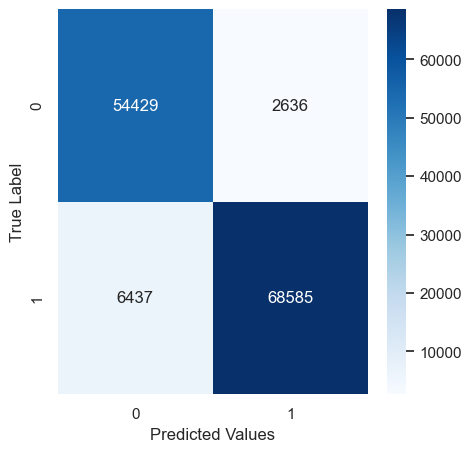

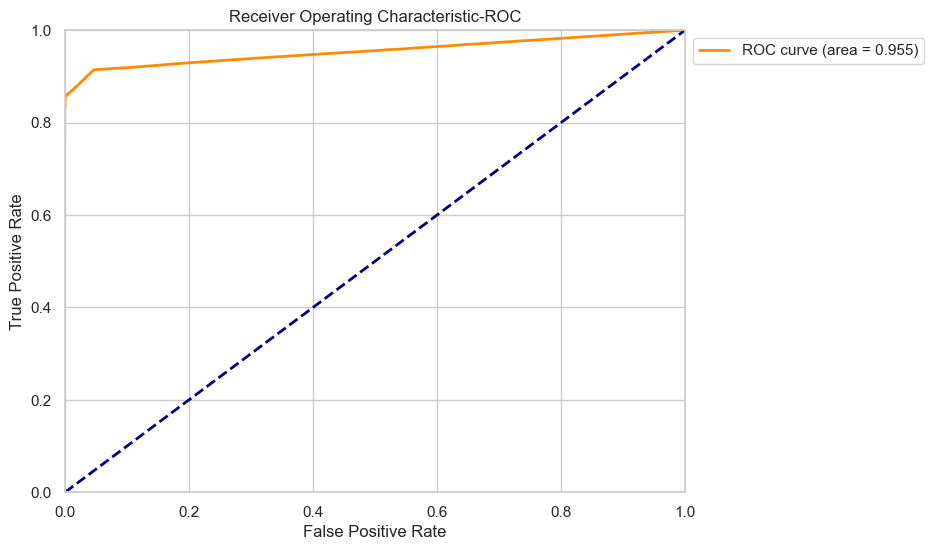

In [74]:
# Define the ANN architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=1)

# Evaluate the model
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose=0)
print(f'Train score: {train_score[1]}')
print(f'Test score: {test_score[1]}')

# Predictions
predictions = (model.predict(X_test) > 0.5).astype("int32")

print('Classification report-----------------------')
print(classification_report(y_test, predictions))

# Confusion Matrix
plt.figure(figsize=(5,5))
labels = ["Not Churn", "Churn"]
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted Values")
plt.ylabel("True Label")

# Get predicted probabilities for the positive class
y_score = model.predict(X_test)

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve using seaborn
plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')
sns.lineplot(x=fpr, y=tpr, color='darkorange', lw=2, label=f'ROC curve (area = {round(roc_auc, 3)})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic-ROC')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


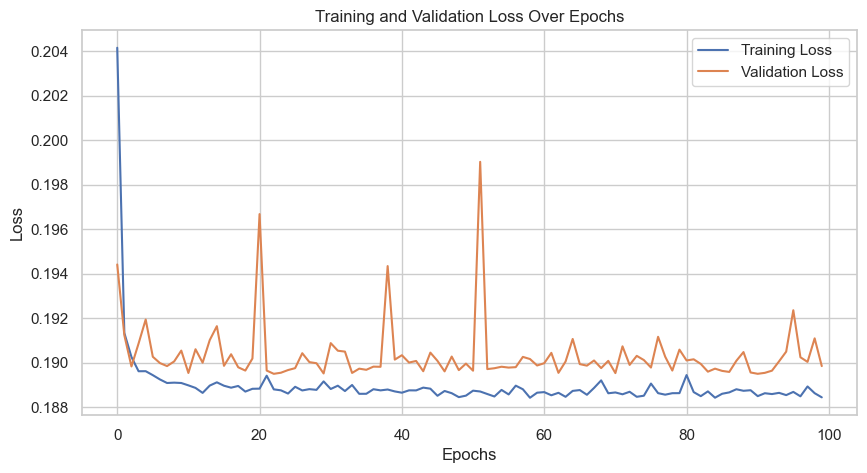

In [75]:
# Plotting the loss graph
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Model Evaluation after PCA (Optional)

## 1. Random Forrest classifier

In [76]:
from sklearn.decomposition import PCA

In [77]:
X=df.drop('Churn',axis=1)
y = df['Churn']

pca = PCA(n_components=0.9)  # preserve 90% of variance
X_pca = pca.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)


Train score: 0.9999967553536665
Test score: 0.9641978393028837
Classification report-----------------------
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96     57025
         1.0       0.98      0.96      0.97     75062

    accuracy                           0.96    132087
   macro avg       0.96      0.97      0.96    132087
weighted avg       0.96      0.96      0.96    132087



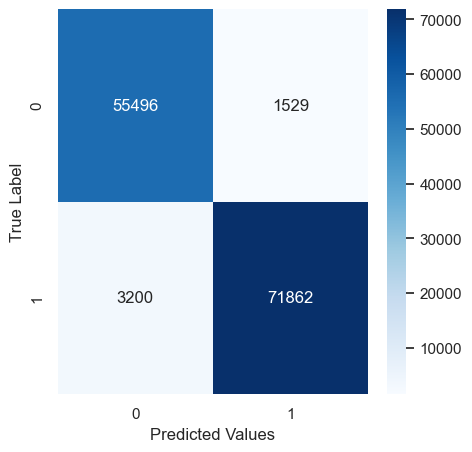

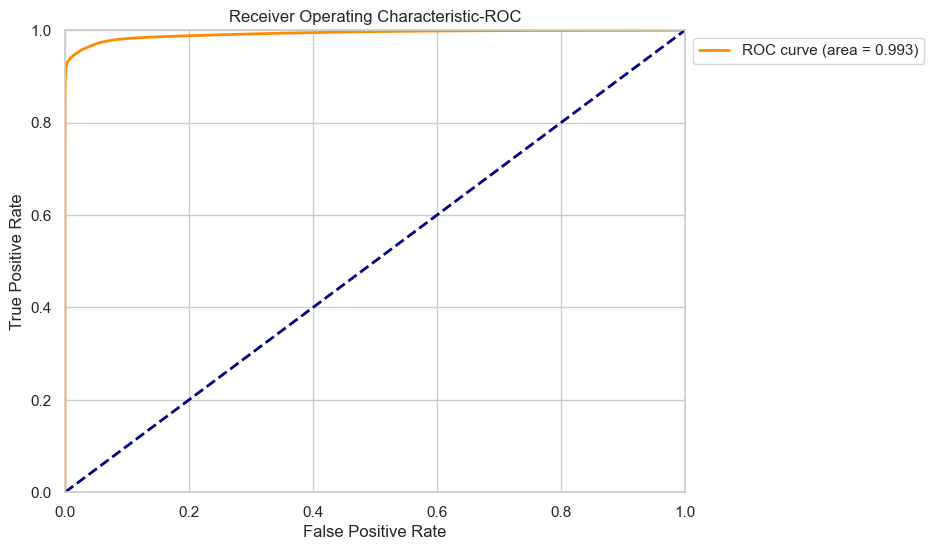

In [80]:
random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

print('Train score:',random_forest.score(X_train,y_train))
print('Test score:',random_forest.score(X_test,y_test))
print('Classification report-----------------------')
print(classification_report(y_test, predictions))

# Confussion Matrix
plt.figure(figsize=(5,5))
labels = ["<=50K", ">50K"]
sns.heatmap(confusion_matrix(y_test, predictions), annot=True,fmt='.0f',cmap=plt.cm.Blues);
plt.xlabel("Predicted Values")
plt.ylabel("True Label")


# Get predicted probabilities for the positive class
y_score = random_forest.predict_proba(X_test)[:, 1]
# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_score)
# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)
# Plot ROC curve using seaborn
plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')
sns.lineplot(x=fpr, y=tpr, color='darkorange', lw=2, label=f'ROC curve (area = {round(roc_auc,3)})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic-ROC')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## 2. ANN

Epoch 1/100
24656/24656 ━━━━━━━━━━━━━━━━━━━━ 25s 987us/step - accuracy: 0.9491 - loss: 0.1320 - val_accuracy: 0.9672 - val_loss: 0.0832
Epoch 2/100
24656/24656 ━━━━━━━━━━━━━━━━━━━━ 23s 950us/step - accuracy: 0.9709 - loss: 0.0770 - val_accuracy: 0.9707 - val_loss: 0.0746
Epoch 3/100
24656/24656 ━━━━━━━━━━━━━━━━━━━━ 24s 971us/step - accuracy: 0.9713 - loss: 0.0745 - val_accuracy: 0.9697 - val_loss: 0.0751
Epoch 4/100
24656/24656 ━━━━━━━━━━━━━━━━━━━━ 24s 952us/step - accuracy: 0.9720 - loss: 0.0723 - val_accuracy: 0.9723 - val_loss: 0.0716
Epoch 5/100
24656/24656 ━━━━━━━━━━━━━━━━━━━━ 23s 918us/step - accuracy: 0.9728 - loss: 0.0709 - val_accuracy: 0.9715 - val_loss: 0.0724
Epoch 6/100
24656/24656 ━━━━━━━━━━━━━━━━━━━━ 24s 971us/step - accuracy: 0.9731 - loss: 0.0694 - val_accuracy: 0.9733 - val_loss: 0.0699
Epoch 7/100
24656/24656 ━━━━━━━━━━━━━━━━━━━━ 23s 923us/step - accuracy: 0.9729 - loss: 0.0685 - val_accuracy: 0.9728 - val_loss: 0.0712
Epoch 8/100
24656/24656 ━━━━━━━━━━━━━━━━━━━━ 23s

Epoch 49/100
24656/24656 ━━━━━━━━━━━━━━━━━━━━ 22s 901us/step - accuracy: 0.9765 - loss: 0.0585 - val_accuracy: 0.9757 - val_loss: 0.0621
Epoch 50/100
24656/24656 ━━━━━━━━━━━━━━━━━━━━ 23s 924us/step - accuracy: 0.9765 - loss: 0.0590 - val_accuracy: 0.9752 - val_loss: 0.0614
Epoch 51/100
24656/24656 ━━━━━━━━━━━━━━━━━━━━ 22s 901us/step - accuracy: 0.9768 - loss: 0.0587 - val_accuracy: 0.9749 - val_loss: 0.0620
Epoch 52/100
24656/24656 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - accuracy: 0.9770 - loss: 0.0576 - val_accuracy: 0.9759 - val_loss: 0.0613
Epoch 53/100
24656/24656 ━━━━━━━━━━━━━━━━━━━━ 34s 1ms/step - accuracy: 0.9765 - loss: 0.0586 - val_accuracy: 0.9756 - val_loss: 0.0617
Epoch 54/100
24656/24656 ━━━━━━━━━━━━━━━━━━━━ 23s 913us/step - accuracy: 0.9764 - loss: 0.0584 - val_accuracy: 0.9758 - val_loss: 0.0611
Epoch 55/100
24656/24656 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - accuracy: 0.9766 - loss: 0.0586 - val_accuracy: 0.9759 - val_loss: 0.0613
Epoch 56/100
24656/24656 ━━━━━━━━━━━━━━━━━━━━ 2

24656/24656 ━━━━━━━━━━━━━━━━━━━━ 22s 887us/step - accuracy: 0.9790 - loss: 0.0526 - val_accuracy: 0.9779 - val_loss: 0.0573
Epoch 98/100
24656/24656 ━━━━━━━━━━━━━━━━━━━━ 25s 1ms/step - accuracy: 0.9784 - loss: 0.0539 - val_accuracy: 0.9779 - val_loss: 0.0578
Epoch 99/100
24656/24656 ━━━━━━━━━━━━━━━━━━━━ 28s 1ms/step - accuracy: 0.9786 - loss: 0.0532 - val_accuracy: 0.9763 - val_loss: 0.0595
Epoch 100/100
24656/24656 ━━━━━━━━━━━━━━━━━━━━ 25s 1000us/step - accuracy: 0.9784 - loss: 0.0545 - val_accuracy: 0.9781 - val_loss: 0.0555
Train score: 0.9788967967033386
Test score: 0.9781129360198975
4128/4128 ━━━━━━━━━━━━━━━━━━━━ 4s 993us/step
Classification report-----------------------
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     57025
         1.0       0.99      0.97      0.98     75062

    accuracy                           0.98    132087
   macro avg       0.98      0.98      0.98    132087
weighted avg       0.98      0.98      0.9

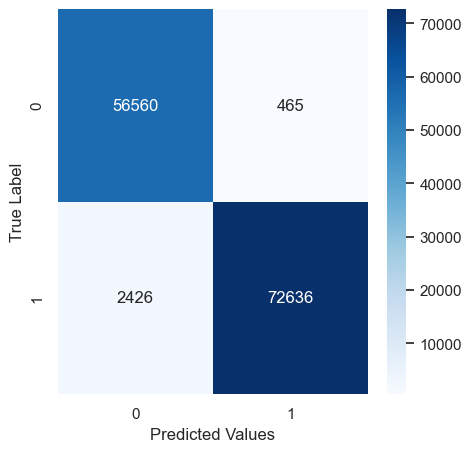

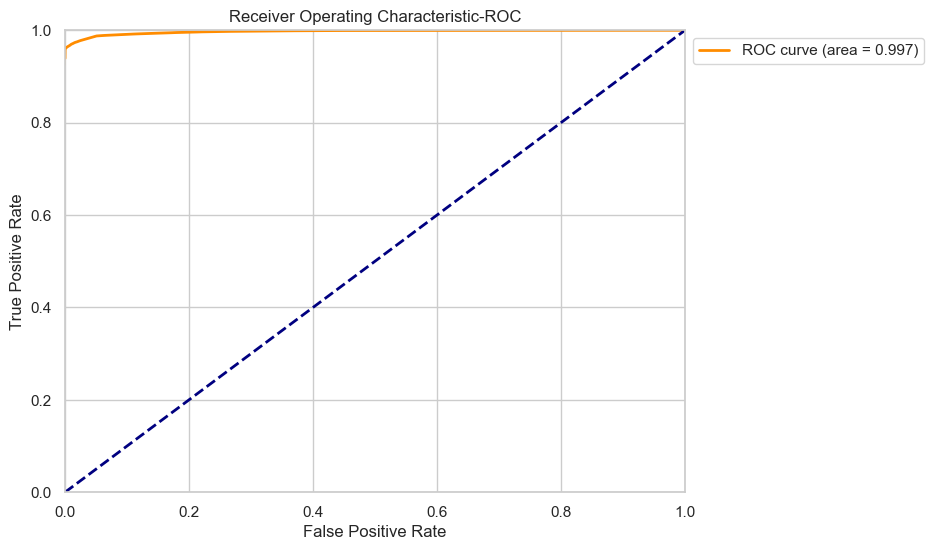

In [78]:
# Define the ANN architecture
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_split=0.2, verbose=1)

# Evaluate the model
train_score = model.evaluate(X_train, y_train, verbose=0)
test_score = model.evaluate(X_test, y_test, verbose=0)
print(f'Train score: {train_score[1]}')
print(f'Test score: {test_score[1]}')

# Predictions
predictions = (model.predict(X_test) > 0.5).astype("int32")

print('Classification report-----------------------')
print(classification_report(y_test, predictions))

# Confusion Matrix
plt.figure(figsize=(5,5))
labels = ["Not Churn", "Churn"]
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='.0f', cmap=plt.cm.Blues)
plt.xlabel("Predicted Values")
plt.ylabel("True Label")

# Get predicted probabilities for the positive class
y_score = model.predict(X_test)

# Calculate false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot ROC curve using seaborn
plt.figure(figsize=(8, 6))
sns.set(style='whitegrid')
sns.lineplot(x=fpr, y=tpr, color='darkorange', lw=2, label=f'ROC curve (area = {round(roc_auc, 3)})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic-ROC')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


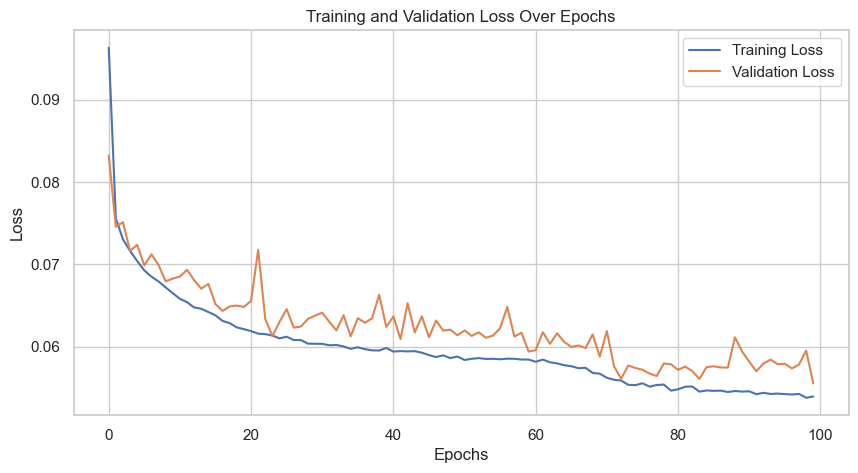

In [79]:
# Plotting the loss graph
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### The Random Forest classifier and ANN provided the best performance both before and after applying PCA. Although both models performed well before PCA, applying PCA resulted in significantly better outcomes. The slight class imbalance of the targe column-`Churn` did not significantly impact the models' performance.